In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/airbnb-prices-in-european-cities/paris_weekends.csv
/kaggle/input/airbnb-prices-in-european-cities/rome_weekends.csv
/kaggle/input/airbnb-prices-in-european-cities/berlin_weekdays.csv
/kaggle/input/airbnb-prices-in-european-cities/amsterdam_weekends.csv
/kaggle/input/airbnb-prices-in-european-cities/lisbon_weekends.csv
/kaggle/input/airbnb-prices-in-european-cities/amsterdam_weekdays.csv
/kaggle/input/airbnb-prices-in-european-cities/rome_weekdays.csv
/kaggle/input/airbnb-prices-in-european-cities/athens_weekends.csv
/kaggle/input/airbnb-prices-in-european-cities/budapest_weekends.csv
/kaggle/input/airbnb-prices-in-european-cities/barcelona_weekdays.csv
/kaggle/input/airbnb-prices-in-european-cities/barcelona_weekends.csv
/kaggle/input/airbnb-prices-in-european-cities/budapest_weekdays.csv
/kaggle/input/airbnb-prices-in-european-cities/vienna_weekdays.csv
/kaggle/input/airbnb-prices-in-european-cities/london_weekends.csv
/kaggle/input/airbnb-prices-in-european-cities/berl

# <span style="color:#000000; font-size:1em;">IMPORT NECESSARY LIBRARIES</span>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import SequentialFeatureSelector,SelectFromModel
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score
import warnings

# <span style="color:#000000; font-size:1em;">IMPORT ALL CSV DATA FILES AND COMBINE THEM</span>

# <span style="color:#01686f; font-size:0.75em;">IMPORT DATASETS</span>

In [3]:
amsterdam_weekdays = pd.read_csv('/kaggle/input/airbnb-prices-in-european-cities/amsterdam_weekdays.csv')
amsterdam_weekends = pd.read_csv('/kaggle/input/airbnb-prices-in-european-cities/amsterdam_weekends.csv')
athens_weekdays = pd.read_csv('/kaggle/input/airbnb-prices-in-european-cities/athens_weekdays.csv')
athens_weekends = pd.read_csv('/kaggle/input/airbnb-prices-in-european-cities/athens_weekends.csv')
barcelona_weekdays = pd.read_csv('/kaggle/input/airbnb-prices-in-european-cities/barcelona_weekdays.csv')
barcelona_weekends = pd.read_csv('/kaggle/input/airbnb-prices-in-european-cities/barcelona_weekends.csv')
berlin_weekdays = pd.read_csv('/kaggle/input/airbnb-prices-in-european-cities/berlin_weekdays.csv')
berlin_weekends = pd.read_csv('/kaggle/input/airbnb-prices-in-european-cities/berlin_weekends.csv')
budapest_weekdays = pd.read_csv('/kaggle/input/airbnb-prices-in-european-cities/budapest_weekdays.csv')
budapest_weekends = pd.read_csv('/kaggle/input/airbnb-prices-in-european-cities/budapest_weekends.csv')
lisbon_weekdays = pd.read_csv('/kaggle/input/airbnb-prices-in-european-cities/lisbon_weekdays.csv')
lisbon_weekends = pd.read_csv('/kaggle/input/airbnb-prices-in-european-cities/lisbon_weekends.csv')
london_weekdays = pd.read_csv('/kaggle/input/airbnb-prices-in-european-cities/london_weekdays.csv')
london_weekends = pd.read_csv('/kaggle/input/airbnb-prices-in-european-cities/london_weekends.csv')
paris_weekdays = pd.read_csv('/kaggle/input/airbnb-prices-in-european-cities/paris_weekdays.csv')
paris_weekends = pd.read_csv('/kaggle/input/airbnb-prices-in-european-cities/paris_weekends.csv')
rome_weekdays = pd.read_csv('/kaggle/input/airbnb-prices-in-european-cities/rome_weekdays.csv')
rome_weekends = pd.read_csv('/kaggle/input/airbnb-prices-in-european-cities/rome_weekends.csv')
vienna_weekdays = pd.read_csv('/kaggle/input/airbnb-prices-in-european-cities/vienna_weekdays.csv')
vienna_weekends = pd.read_csv('/kaggle/input/airbnb-prices-in-european-cities/vienna_weekends.csv')

# <span style="color:#01686f; font-size:0.75em;">DIMENSIONS OF IMPORTED DATASETS</span>

In [4]:
print('amsterdam_weekdays shape = ' + str(amsterdam_weekdays.shape))
print('amsterdam_weekends shape = ' + str(amsterdam_weekends.shape))
print('athens_weekdays shape = ' + str(athens_weekdays.shape))
print('athens_weekends shape = ' + str(athens_weekends.shape))
print('barcelona_weekdays shape = ' + str(barcelona_weekdays.shape))
print('barcelona_weekends shape = ' + str(barcelona_weekends.shape))
print('berlin_weekdays shape = ' + str(berlin_weekdays.shape))
print('berlin_weekends shape = ' + str(berlin_weekends.shape))
print('budapest_weekdays shape = ' + str(budapest_weekdays.shape))
print('budapest_weekends shape = ' + str(budapest_weekends.shape))
print('lisbon_weekdays shape = ' + str(lisbon_weekdays.shape))
print('lisbon_weekends shape = ' + str(lisbon_weekends.shape))
print('london_weekdays shape = ' + str(london_weekdays.shape))
print('london_weekends shape = ' + str(london_weekends.shape))
print('paris_weekdays shape = ' + str(paris_weekdays.shape))
print('paris_weekends shape = ' + str(paris_weekends.shape))
print('rome_weekdays shape = ' + str(rome_weekdays.shape))
print('rome_weekends shape = ' + str(rome_weekends.shape))
print('vienna_weekdays shape = ' + str(vienna_weekdays.shape))
print('vienna_weekends shape = ' + str(vienna_weekends.shape))

amsterdam_weekdays shape = (1103, 20)
amsterdam_weekends shape = (977, 20)
athens_weekdays shape = (2653, 20)
athens_weekends shape = (2627, 20)
barcelona_weekdays shape = (1555, 20)
barcelona_weekends shape = (1278, 20)
berlin_weekdays shape = (1284, 20)
berlin_weekends shape = (1200, 20)
budapest_weekdays shape = (2074, 20)
budapest_weekends shape = (1948, 20)
lisbon_weekdays shape = (2857, 20)
lisbon_weekends shape = (2906, 20)
london_weekdays shape = (4614, 20)
london_weekends shape = (5379, 20)
paris_weekdays shape = (3130, 20)
paris_weekends shape = (3558, 20)
rome_weekdays shape = (4492, 20)
rome_weekends shape = (4535, 20)
vienna_weekdays shape = (1738, 20)
vienna_weekends shape = (1799, 20)


# <span style="color:#01686f; font-size:0.75em;">FEATURES OF THE IMPORTED DATASETS</span>

In [5]:
print(amsterdam_weekdays.columns)
print(amsterdam_weekends.columns)
print(athens_weekdays.columns)
print(athens_weekends.columns)
print(barcelona_weekdays.columns)
print(barcelona_weekends.columns)
print(berlin_weekdays.columns)
print(berlin_weekends.columns)
print(budapest_weekdays.columns)
print(budapest_weekends.columns)
print(lisbon_weekdays.columns)
print(lisbon_weekends.columns)
print(london_weekdays.columns)
print(london_weekends.columns)
print(paris_weekdays.columns)
print(paris_weekends.columns)
print(rome_weekdays.columns)
print(rome_weekends.columns)
print(vienna_weekdays.columns)
print(vienna_weekends.columns)

Index(['Unnamed: 0', 'realSum', 'room_type', 'room_shared', 'room_private',
       'person_capacity', 'host_is_superhost', 'multi', 'biz',
       'cleanliness_rating', 'guest_satisfaction_overall', 'bedrooms', 'dist',
       'metro_dist', 'attr_index', 'attr_index_norm', 'rest_index',
       'rest_index_norm', 'lng', 'lat'],
      dtype='object')
Index(['Unnamed: 0', 'realSum', 'room_type', 'room_shared', 'room_private',
       'person_capacity', 'host_is_superhost', 'multi', 'biz',
       'cleanliness_rating', 'guest_satisfaction_overall', 'bedrooms', 'dist',
       'metro_dist', 'attr_index', 'attr_index_norm', 'rest_index',
       'rest_index_norm', 'lng', 'lat'],
      dtype='object')
Index(['Unnamed: 0', 'realSum', 'room_type', 'room_shared', 'room_private',
       'person_capacity', 'host_is_superhost', 'multi', 'biz',
       'cleanliness_rating', 'guest_satisfaction_overall', 'bedrooms', 'dist',
       'metro_dist', 'attr_index', 'attr_index_norm', 'rest_index',
       'rest_ind

<ul>
    <li style="color:#52796f; font-size:0.85em;">
    <h3 >From observing the shapes of the Individual imported data files, we can see that the number of features in all othe files are same, the number of records however, is different</h3></li>
    <li style="color:#52796f; font-size:0.85em;">
    <h3 >From observing the List of feature names , we can see that all datasets have the same number, as well as the same features, thus they can be stacked on top of each other in order to convert all these different datasets into a single dataset.</h3>
        </li>
 
</ul>

# <span style="color:#01686f; font-size:0.75em;">COMBINE ALL THE DIFFERENT DATASETS INTO A SINGLE ONE</span>

In [6]:
def combine(csv_1,col_1,csv_2,col_2,city):       # Combine the 2 datasets into a single dataset.
    csv_1['week time'] = col_1
    csv_2['week time'] = col_2
    csv_1.drop(columns = ['Unnamed: 0'],inplace=True)
    csv_2.drop(columns = ['Unnamed: 0'],inplace=True)
    merged = pd.concat([csv_1, csv_2])
    merged['city'] = city
    return merged

<ul>
    <li style="color:#52796f; font-size:0.85em;">
    <h3 >In the above funtion, we combine the 'weekdays' and 'weekend' datasets of the individual datasets into 1
        dataset for a particular city</h3></li>
    <li style="color:#52796f; font-size:0.85em;">
    <h3 >We also add the name of the City and put it into a new column 'city', since we will be combining all these cities datasets and thus would need to differentiate the data of cities in some way for analysis and insights</h3></li>
 <li style="color:#52796f; font-size:0.85em;">
    <h3 >We also remove the unnamed:0 feature since it is the index number of the records, thus is not very useful</h3></li>
</ul>

In [7]:
amsterdam = combine(amsterdam_weekdays,'weekdays',amsterdam_weekends,'weekends','amsterdam')
athens = combine(athens_weekdays,'weekdays',athens_weekends,'weekends','athens')
barcelona = combine(barcelona_weekdays,'weekdays',barcelona_weekends,'weekends','barcelona')
berlin = combine(berlin_weekdays,'weekdays',berlin_weekends,'weekends','berlin')
budapest = combine(budapest_weekdays,'weekdays',budapest_weekends,'weekends','budapest')
lisbon = combine(lisbon_weekdays,'weekdays',lisbon_weekends,'weekends','lisbon')
london = combine(london_weekdays,'weekdays',london_weekends,'weekends','london')
paris = combine(paris_weekdays,'weekdays',paris_weekends,'weekends','paris')
rome = combine(rome_weekdays,'weekdays',rome_weekends,'weekends','rome')
vienna = combine(vienna_weekdays,'weekdays',vienna_weekends,'weekends','vienna')

In [8]:
cities_names = ['amsterdam', 'athens', 'barcelona', 'berlin', 'budapest', 'lisbon', 'london', 'paris', 'rome', 'vienna']
cities = [amsterdam, athens, barcelona, berlin, budapest, lisbon, london, paris, rome, vienna]

In [9]:
europe_data = pd.concat(cities, ignore_index=True) 

<ul>
<li style="color:#52796f; font-size:0.85em;">
    <h3 >using pandas'concat function, we vertically stacked data of all cities, to transform them into a single dataset</h3></li></ul>

# <span style="color:#000000; font-size:1.00em;">CLEAN & ANALYZE THE DATA</span>

In [10]:
europe_data.head()

,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,...,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,week time,city
0,194.033698,Private room,False,True,2.0,False,1,0,10.0,93.0,...,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,weekdays,amsterdam
1,344.245776,Private room,False,True,4.0,False,0,0,8.0,85.0,...,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,weekdays,amsterdam
2,264.101422,Private room,False,True,2.0,False,0,1,9.0,87.0,...,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,weekdays,amsterdam
3,433.529398,Private room,False,True,4.0,False,0,1,9.0,90.0,...,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663,weekdays,amsterdam
4,485.552926,Private room,False,True,2.0,True,0,0,10.0,98.0,...,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508,weekdays,amsterdam


In [11]:
europe_data.tail()

,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,...,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,week time,city
51702,715.938574,Entire home/apt,False,False,6.0,False,0,1,10.0,100.0,...,0.530181,0.135447,219.402478,15.712158,438.756874,10.604584,16.37940,48.21136,weekends,vienna
51703,304.793960,Entire home/apt,False,False,2.0,False,0,0,8.0,86.0,...,0.810205,0.100839,204.970121,14.678608,342.182813,8.270427,16.38070,48.20296,weekends,vienna
51704,637.168969,Entire home/apt,False,False,2.0,False,0,0,10.0,93.0,...,0.994051,0.202539,169.073402,12.107921,282.296424,6.822996,16.38568,48.20460,weekends,vienna
51705,301.054157,Private room,False,True,2.0,False,0,0,10.0,87.0,...,3.044100,0.287435,109.236574,7.822803,158.563398,3.832416,16.34100,48.19200,weekends,vienna
51706,133.230489,Private room,False,True,4.0,True,1,0,10.0,93.0,...,1.263932,0.480903,150.450381,10.774264,225.247293,5.444140,16.39066,48.20811,weekends,vienna


In [12]:
europe_data.sample(5)

,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,...,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,week time,city
48069,129.520959,Private room,False,True,3.0,False,0,1,10.0,80.0,...,3.597678,0.439619,173.862355,3.851998,540.160204,11.768780,12.52272,41.92942,weekends,rome
20159,191.838649,Entire home/apt,False,False,4.0,True,0,1,10.0,98.0,...,1.847413,0.238067,129.997598,4.287746,378.668621,21.282178,-9.15857,38.71992,weekends,lisbon
11882,182.060391,Shared room,True,False,6.0,False,0,1,10.0,97.0,...,2.560851,0.472551,119.609016,18.230877,143.450514,30.349768,13.44571,52.50881,weekends,berlin
20356,723.264540,Entire home/apt,False,False,4.0,False,0,1,10.0,100.0,...,0.298827,0.184475,526.058050,17.351113,1144.434934,64.320270,-9.13800,38.71000,weekends,lisbon
12043,162.428718,Private room,False,True,2.0,False,0,0,9.0,92.0,...,2.520478,0.435771,102.278595,15.589364,144.664778,30.606670,13.44960,52.51308,weekends,berlin


In [13]:
europe_data.isna().sum()

realSum                       0
room_type                     0
room_shared                   0
room_private                  0
person_capacity               0
host_is_superhost             0
multi                         0
biz                           0
cleanliness_rating            0
guest_satisfaction_overall    0
bedrooms                      0
dist                          0
metro_dist                    0
attr_index                    0
attr_index_norm               0
rest_index                    0
rest_index_norm               0
lng                           0
lat                           0
week time                     0
city                          0
dtype: int64

<ul>
<li style="color:#52796f; font-size:0.85em;">
    <h3 >There are no null or NaN values in the whole dataset, which is what we want, and saves us a step in data cleaning.</h3></li></ul>

In [14]:
europe_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51707 entries, 0 to 51706
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   realSum                     51707 non-null  float64
 1   room_type                   51707 non-null  object 
 2   room_shared                 51707 non-null  bool   
 3   room_private                51707 non-null  bool   
 4   person_capacity             51707 non-null  float64
 5   host_is_superhost           51707 non-null  bool   
 6   multi                       51707 non-null  int64  
 7   biz                         51707 non-null  int64  
 8   cleanliness_rating          51707 non-null  float64
 9   guest_satisfaction_overall  51707 non-null  float64
 10  bedrooms                    51707 non-null  int64  
 11  dist                        51707 non-null  float64
 12  metro_dist                  51707 non-null  float64
 13  attr_index                  517

<ul>
<li style="color:#52796f; font-size:0.85em;">
    <h3 >We can cross check that all the values are non-null in the dataset</h3></li>
<li style="color:#52796f; font-size:0.85em;">
    <h3 >We have features having, object (multiple), float and int datatypes. Meaning that we can be having ordinal,categorical and binary/boolean features in our data</h3></li>
</ul>

In [15]:
europe_data.describe()

,realSum,person_capacity,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
count,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.00000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000
mean,279.879591,3.161661,0.291353,0.350204,9.390624,92.628232,1.15876,3.191285,0.681540,294.204105,13.423792,626.856696,22.786177,7.426068,45.671128
std,327.948386,1.298545,0.454390,0.477038,0.954868,8.945531,0.62741,2.393803,0.858023,224.754123,9.807985,497.920226,17.804096,9.799725,5.249263
min,34.779339,2.000000,0.000000,0.000000,2.000000,20.000000,0.00000,0.015045,0.002301,15.152201,0.926301,19.576924,0.592757,-9.226340,37.953000
25%,148.752174,2.000000,0.000000,0.000000,9.000000,90.000000,1.00000,1.453142,0.248480,136.797385,6.380926,250.854114,8.751480,-0.072500,41.399510
50%,211.343089,3.000000,0.000000,0.000000,10.000000,95.000000,1.00000,2.613538,0.413269,234.331748,11.468305,522.052783,17.542238,4.873000,47.506690
75%,319.694287,4.000000,1.000000,1.000000,10.000000,99.000000,1.00000,4.263077,0.737840,385.756381,17.415082,832.628988,32.964603,13.518825,51.471885
max,18545.450285,6.000000,1.000000,1.000000,10.000000,100.000000,10.00000,25.284557,14.273577,4513.563486,100.000000,6696.156772,100.000000,23.786020,52.641410


In [16]:
europe_data['city'].value_counts()

london       9993
rome         9027
paris        6688
lisbon       5763
athens       5280
budapest     4022
vienna       3537
barcelona    2833
berlin       2484
amsterdam    2080
Name: city, dtype: int64

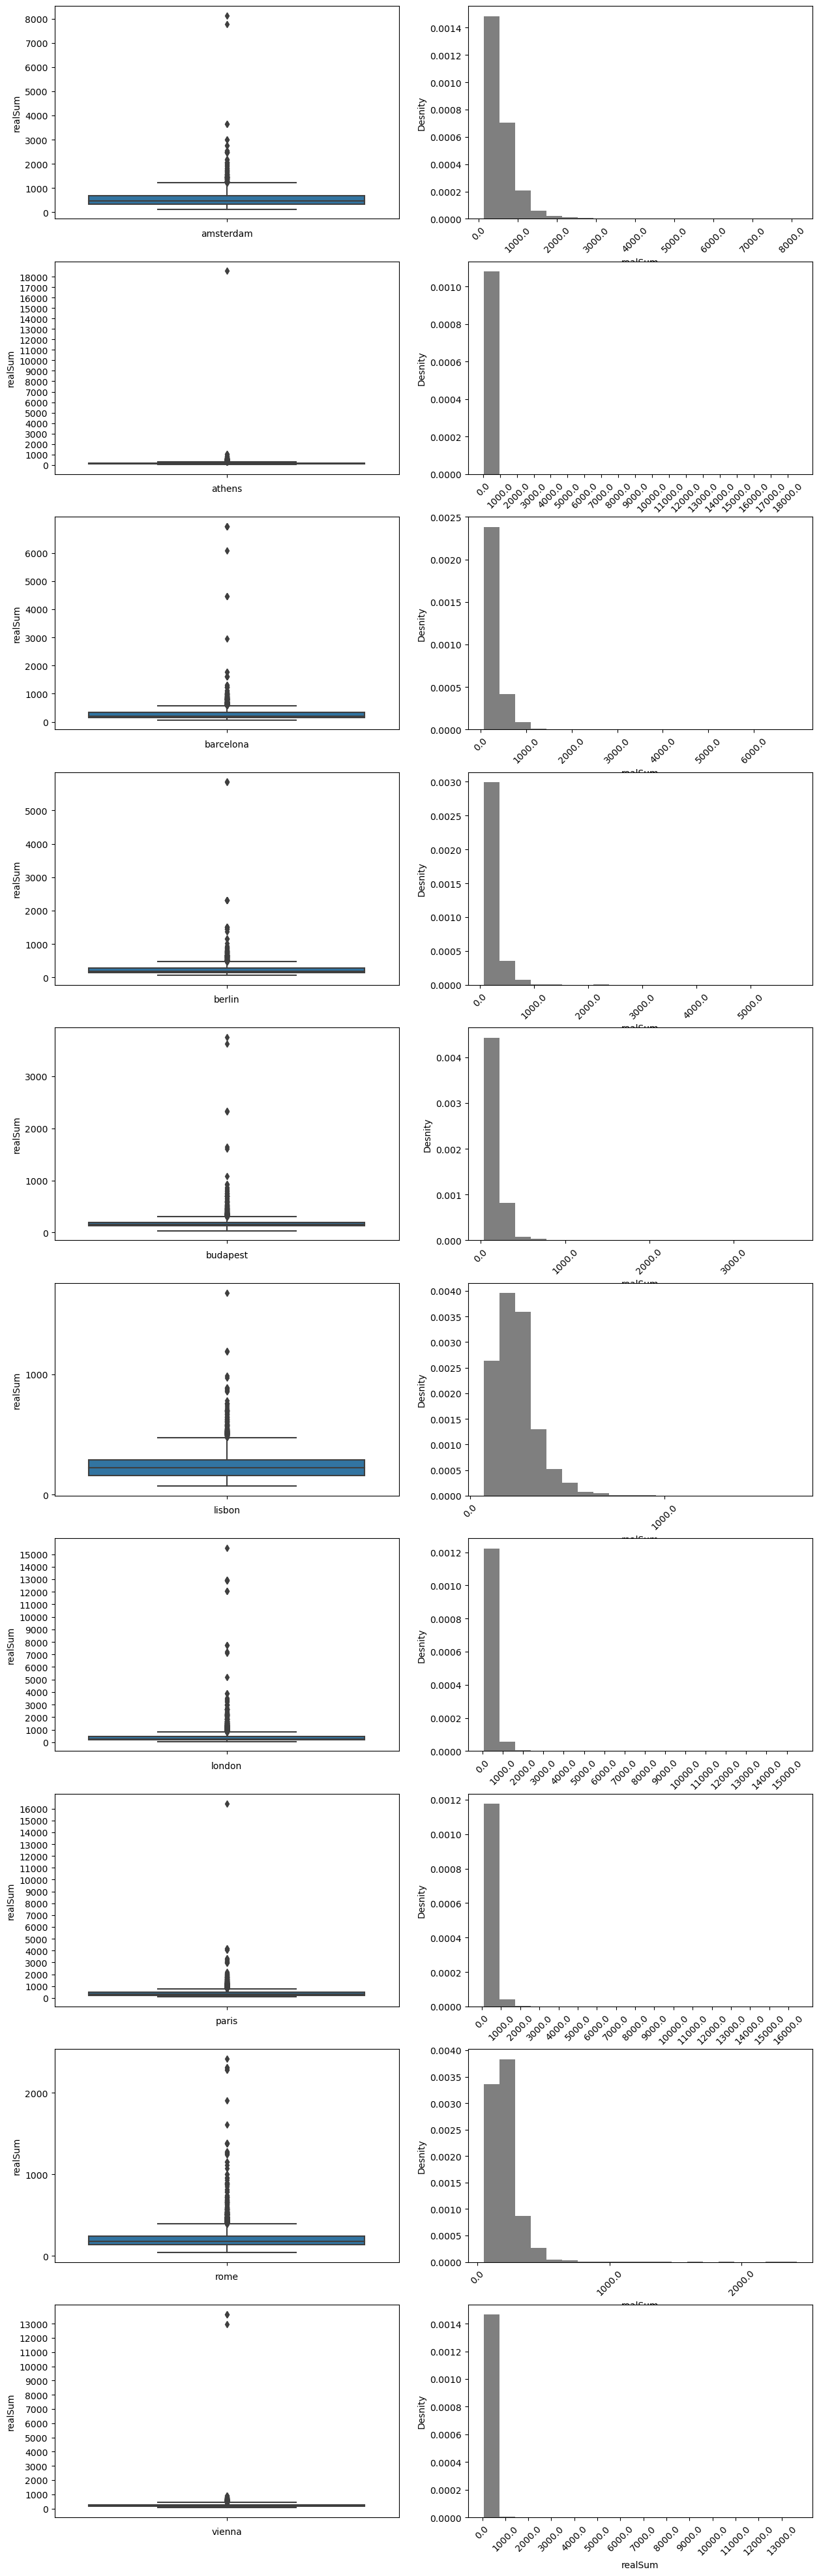

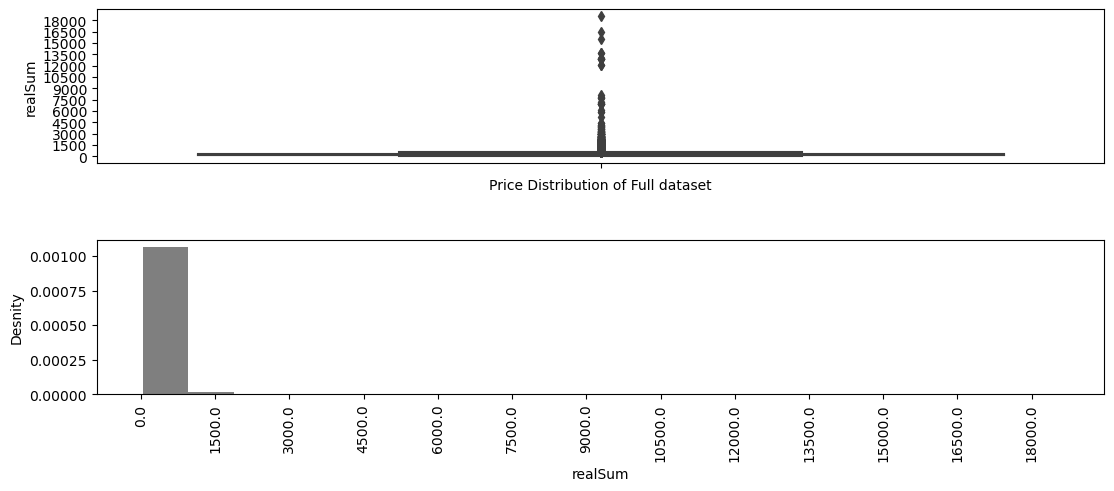

In [17]:
warnings.filterwarnings('ignore')

def plotter_1(city,row):
    sns.boxplot(y='realSum', data=city, ax=axs[row,0])
    axs[row,0].set_yticks(np.arange(0,max(city['realSum']),1000))
    axs[row,0].set_xlabel(cities_names[row])
    axs[row,0].set_ylabel('realSum')
    
    axs[row,1].hist(city['realSum'], bins=20, alpha=0.5, color='000000', density=True)
    axs[row,1].set_xticklabels(np.arange(0,max(city['realSum']),1000),rotation=45)
    axs[row,1].set_xticks(np.arange(0,max(city['realSum']),1000),rotation=45)
    axs[row,1].set_xlabel('realSum')
    axs[row,1].set_ylabel('Desnity')

plt.figure
fig, axs = plt.subplots(nrows=10, ncols=2, figsize=(15, 50))
fig2, axs2 = plt.subplots(nrows=2, ncols=1, figsize=(13, 5))

sns.boxplot(y='realSum', data=europe_data, ax=axs2[0])
axs2[0].set_yticks(np.arange(0,max(europe_data['realSum']),1500))
axs2[0].set_xlabel('Price Distribution of Full dataset')
axs2[0].set_ylabel('realSum')

axs2[1].hist(europe_data['realSum'], bins=20, alpha=0.5, color='000000', density=True)
axs2[1].set_xticklabels(np.arange(0,max(europe_data['realSum']),1500),rotation=90)
axs2[1].set_xticks(np.arange(0,max(europe_data['realSum']),1500),rotation=90)
axs2[1].set_xlabel('realSum')
axs2[1].set_ylabel('Desnity')

row = 0
for city in cities:
    plotter_1(city,row)
    row = row + 1
row = 0
    
plt.subplots_adjust(hspace=0.50)
plt.show()

In [18]:
print('Inter-Quartile Range of realSum : ' + str(europe_data['realSum'].quantile(0.75) - europe_data['realSum'].quantile(0.25)))

Inter-Quartile Range of realSum : 170.94211280448903


<ul>
<li style="color:#52796f; font-size:0.85em;">
    <h3 >Looking at the interquartile range and the Description table of the dataset, it is evident that majority of the prices of listings in europe range from \$149 to \$320 while the IQR is \$171.</h3></li>
    
<li style="color:#52796f; font-size:0.85em;">
    <h3 >There is quite a difference between the number of records / observations in each city.</h3></li>
    
<li style="color:#52796f; font-size:0.85em;">
    <h3 >From the above plots we can see that there are a lot of outliers in the data, let's make a copy of the above dataset and remove the outliers from them. We are creating new copy and will not be making changes to the original dataset so that we can analyze and play with the original dataset if we need to later.</h3></li>
    
<li style="color:#52796f; font-size:0.85em;">
    <h3 >We shall oserve the distribution after removing the outliers, let's set the outlier limit for each city after observing the above plots</h3></li>

</ul>

# <span style="color:#01686f; font-size:0.75em;">REMOVING OUTLIERS AND PLOTTING PRICE DISTRIBUTION</span>

In [19]:
cities_2 = [amsterdam[amsterdam['realSum'] < 2000], athens[athens['realSum'] < 500], barcelona[barcelona['realSum'] < 1000], berlin[berlin['realSum'] < 800], budapest[budapest['realSum'] < 550], lisbon[lisbon['realSum'] < 650], london[london['realSum'] < 1500], paris[paris['realSum'] < 1200], rome[rome['realSum'] < 550], vienna[vienna['realSum'] < 750]]

In [20]:
europe_data_2 = pd.concat(cities_2, ignore_index=True)

In [21]:
europe_data_2.describe()

,realSum,person_capacity,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
count,51176.000000,51176.000000,51176.000000,51176.000000,51176.000000,51176.000000,51176.000000,51176.000000,51176.000000,51176.000000,51176.000000,51176.000000,51176.000000,51176.000000,51176.000000
mean,263.785977,3.145869,0.291562,0.349637,9.388698,92.606065,1.149328,3.198368,0.683459,292.396435,13.340328,623.876219,22.688302,7.427604,45.665365
std,181.924134,1.288028,0.454486,0.476860,0.955359,8.946068,0.617112,2.397423,0.861179,222.671168,9.692772,495.464940,17.756666,9.807457,5.250456
min,34.779339,2.000000,0.000000,0.000000,2.000000,20.000000,0.000000,0.015045,0.002301,15.152201,0.926301,19.576924,0.592757,-9.226340,37.953000
25%,148.405632,2.000000,0.000000,0.000000,9.000000,90.000000,1.000000,1.455985,0.248913,136.072325,6.354334,249.825898,8.716792,-0.072500,41.399160
50%,208.911031,3.000000,0.000000,0.000000,10.000000,95.000000,1.000000,2.621214,0.413968,233.259410,11.417817,520.379828,17.463615,4.873450,47.506630
75%,313.036525,4.000000,1.000000,1.000000,10.000000,98.000000,1.000000,4.269726,0.739540,383.608836,17.341402,829.794258,32.801151,13.537420,51.471185
max,1997.515994,6.000000,1.000000,1.000000,10.000000,100.000000,10.000000,25.284557,14.273577,4513.563486,100.000000,6696.156772,100.000000,23.786020,52.641410


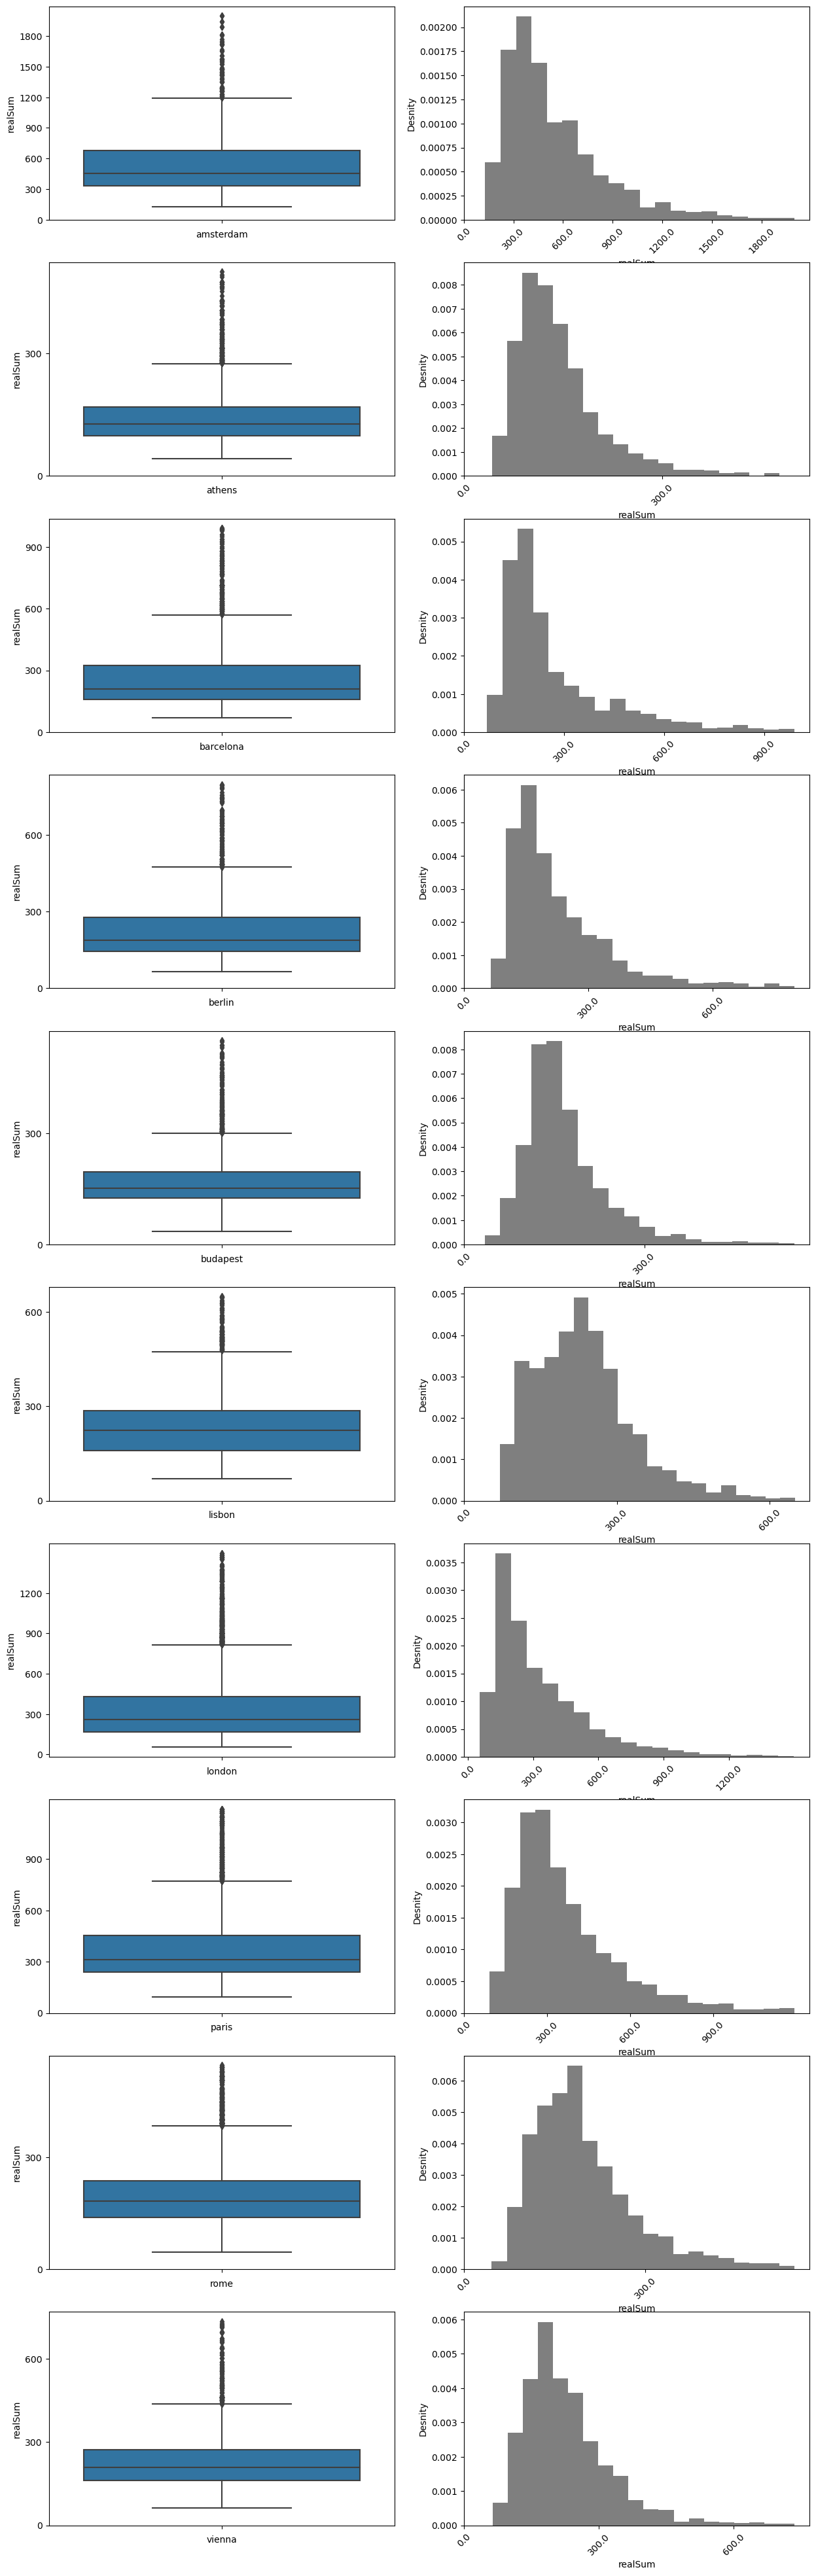

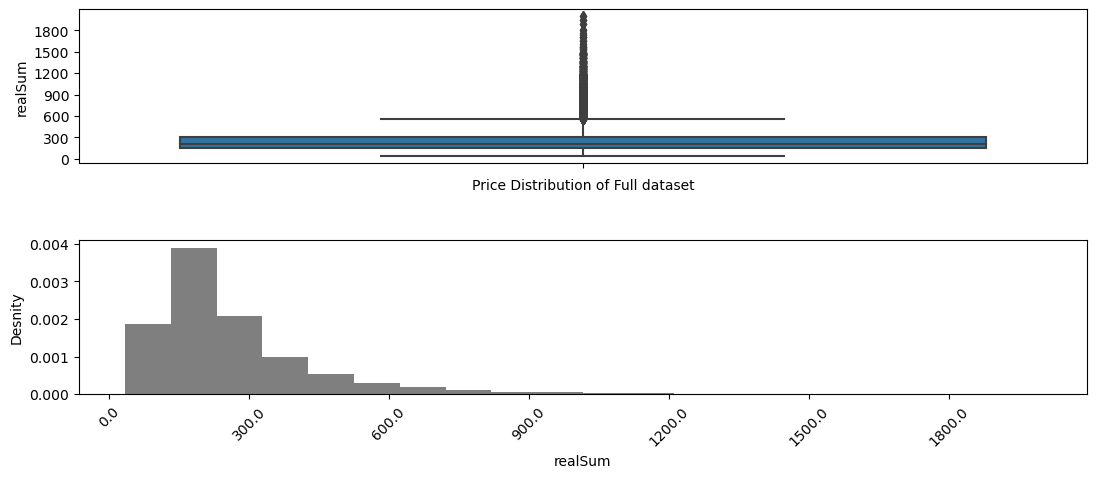

In [22]:
warnings.filterwarnings('ignore')

def plotter_2(city,row):
    sns.boxplot(y='realSum', data=city, ax=axs[row,0])
    axs[row,0].set_yticks(np.arange(0,max(city['realSum']),300))
    axs[row,0].set_xlabel(cities_names[row])
    axs[row,0].set_ylabel('realSum')
    
    axs[row,1].hist(city['realSum'], bins=20, alpha=0.5, color='#000000', density=True)
    axs[row,1].set_xticklabels(np.arange(0,max(city['realSum']),300),rotation=45)
    axs[row,1].set_xticks(np.arange(0,max(city['realSum']),300),rotation=45)
    axs[row,1].set_xlabel('realSum')
    axs[row,1].set_ylabel('Desnity')

plt.figure
fig, axs = plt.subplots(nrows=10, ncols=2, figsize=(15, 50))
fig2, axs2 = plt.subplots(nrows=2, ncols=1, figsize=(13, 5))
row = 0
for city in cities_2:
    plotter_2(city,row)
    row = row + 1
row = 0

sns.boxplot(y='realSum', data=europe_data_2, ax=axs2[0])
axs2[0].set_yticks(np.arange(0,max(europe_data_2['realSum']),300))
axs2[0].set_xlabel('Price Distribution of Full dataset')
axs2[0].set_ylabel('realSum')

axs2[1].hist(europe_data_2['realSum'], bins=20, alpha=0.5, color='000000', density=True)
axs2[1].set_xticklabels(np.arange(0,max(europe_data_2['realSum']),300),rotation=45)
axs2[1].set_xticks(np.arange(0,max(europe_data_2['realSum']),300),rotation=45)
axs2[1].set_xlabel('realSum')
axs2[1].set_ylabel('Desnity')
    
plt.subplots_adjust(hspace=0.50)
plt.show()

<ul>
<li style="color:#52796f; font-size:0.85em;">
    <h3 >Removed outliers from the original dataset, not simply by looking at IQR, but by trial and test, and lowering the benchmark for the outlier to the point that there were considerable amount of observations, even in the outlier portion.</h3></li>


</ul>

# <span style="color:#01686f; font-size:0.75em;">AFFECT OF TIME OF THE WEEK ON PRICES</span>

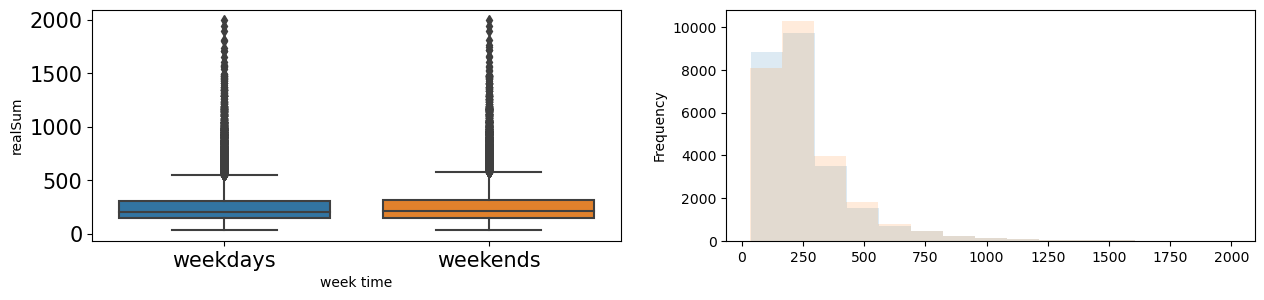

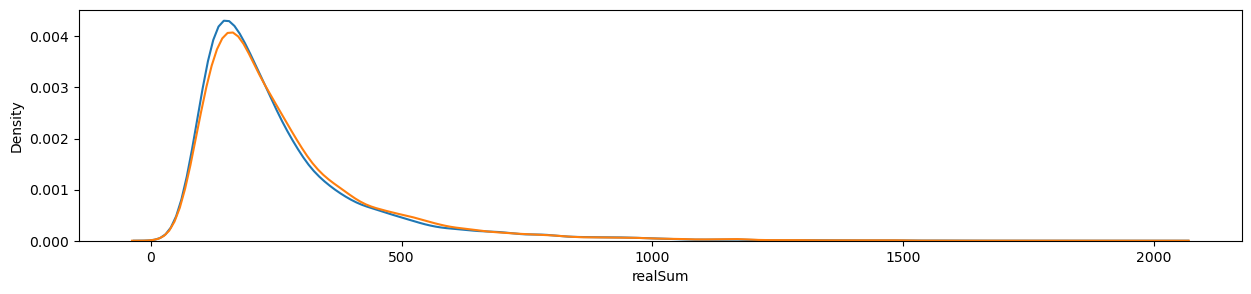

In [23]:
plt.figure
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 3))
fig2, axs2 = plt.subplots(nrows=1, ncols=1, figsize=(15, 3))
sns.boxplot(y='realSum', data=europe_data_2,x='week time',ax = axs[0])
axs[0].tick_params(axis='y', labelsize=15)
axs[0].tick_params(axis='x', labelsize=15)

europe_data_2.groupby('week time')['realSum'].plot(kind='hist', alpha=0.15, bins=15,ax=axs[1])

sns.kdeplot(data=europe_data_2[europe_data_2['week time'] == 'weekdays']['realSum'], label='weekdays',ax=axs2)
sns.kdeplot(data=europe_data_2[europe_data_2['week time'] == 'weekends']['realSum'], label='weekends',ax=axs2)
plt.subplots_adjust(hspace=0.65)
plt.show()

<ul>
<li style="color:#52796f; font-size:0.85em;">
    <h3>Surprisingly, there is almost no difference between the ranges and distribution of realSum on weekends and weekdays</h3></li>
</ul>

# <span style="color:#01686f; font-size:0.75em;">FREQUENCY DISTRIBUTION OF NUMERIC FEATURES</span>

In [24]:
list(europe_data_2.select_dtypes(include=['int64','float64']))

['realSum',
 'person_capacity',
 'multi',
 'biz',
 'cleanliness_rating',
 'guest_satisfaction_overall',
 'bedrooms',
 'dist',
 'metro_dist',
 'attr_index',
 'attr_index_norm',
 'rest_index',
 'rest_index_norm',
 'lng',
 'lat']

<ul>
<li style="color:#52796f; font-size:0.85em;">
    <h3>We list all the features with numeric data types in order to display their boxplot and frequency plot.</h3></li>
<li style="color:#52796f; font-size:0.85em;">
    <h3>Pandas also considers boolean features in which 1,0 represents True,False as numeric, thus we will ignore those for the following plots and analyze them later</h3></li>
</ul>
</ul>

In [25]:
europe_data_2_numerical_features = list(europe_data_2.select_dtypes(include=['int64','float64']).columns[i] for i in [1,4,5,6,7,8,9,10,11,12,13,14])

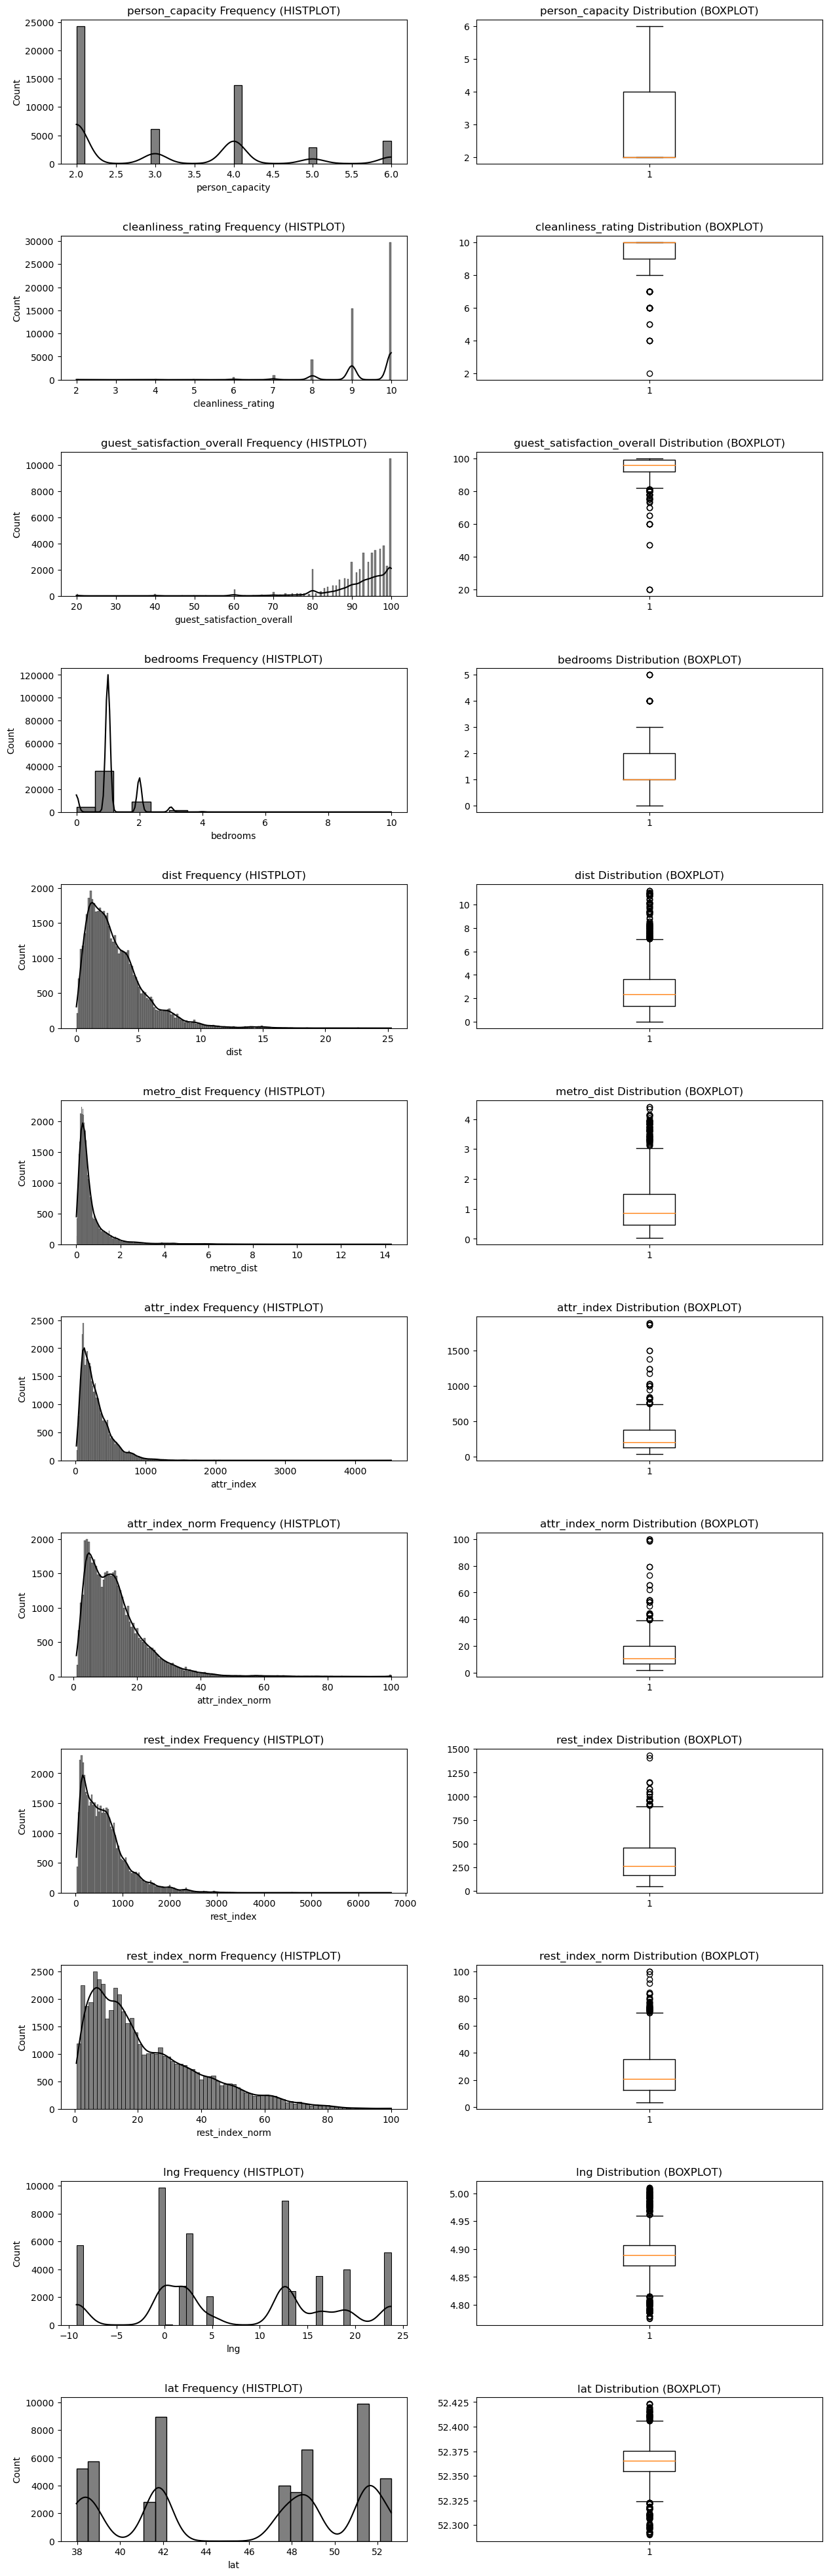

In [26]:
def plotter_3(feature,color,row):
    sns.histplot(data=europe_data_2[feature],ax=axes[row,0],kde=True,color=color,line_kws={'color': 'Yellow'})
    axes[row,0].set_title(str(feature)+" Frequency (HISTPLOT)")
    axes[row,1].boxplot(amsterdam[feature])
    axes[row,1].set_title(str(feature)+" Distribution (BOXPLOT)")
    
    
plt.figure
fig, axes = plt.subplots(nrows=12, ncols=2, figsize=(15, 50))
for i in range(12):
    plotter_3( europe_data_2_numerical_features[i] , '#000000' , i)


plt.subplots_adjust(hspace=0.50)
plt.show()


<ul>
<li style="color:#52796f; font-size:0.85em;">
    <h3>In european listings of Air Bnb, the people capacity in Descending order are 2,4,3,6 and 5 bedrooms .</h3></li>
<li style="color:#52796f; font-size:0.85em;">
    <h3>The cleanliness rating of listings can be thought of having a left skewed shape. From the boxplot it can be seen that majority of the ratings are 8-10. Thus european listings have a very high cleanliness rating on average</h3></li>
<li style="color:#52796f; font-size:0.85em;">
    <h3>The guest satisfaction scores follow more or less of the same pattern as cleanliness rating. <b> wonder if there is a relation between cleanliness rating and guest satisfaction?</b> Hold on, we'll be finding this later.</h3></li>  
<li style="color:#52796f; font-size:0.85em;">
    <h3>In european listings of Air Bnb, the Number of Bedrooms listings have in Descending order are 1,studio,2,3 and 4 bedrooms .</h3></li>
<li style="color:#52796f; font-size:0.85em;">
    <h3>Most of the listings are within 7 km's of the city centre while there are relatively few listings that are 7 - 10 km's from the city centre</h3></li>
<li style="color:#52796f; font-size:0.85em;">
    <h3>Most of the listings are within 3 km's of the closest metro while there are relatively few listings that are 3 - 5 km's from the closest metro</h3></li>
</ul>

# <span style="color:#01686f; font-size:0.75em;">SCATTERPLOT OF NUMERIC FEATURES AND TREND LINE W.R.T REALSUM</span>

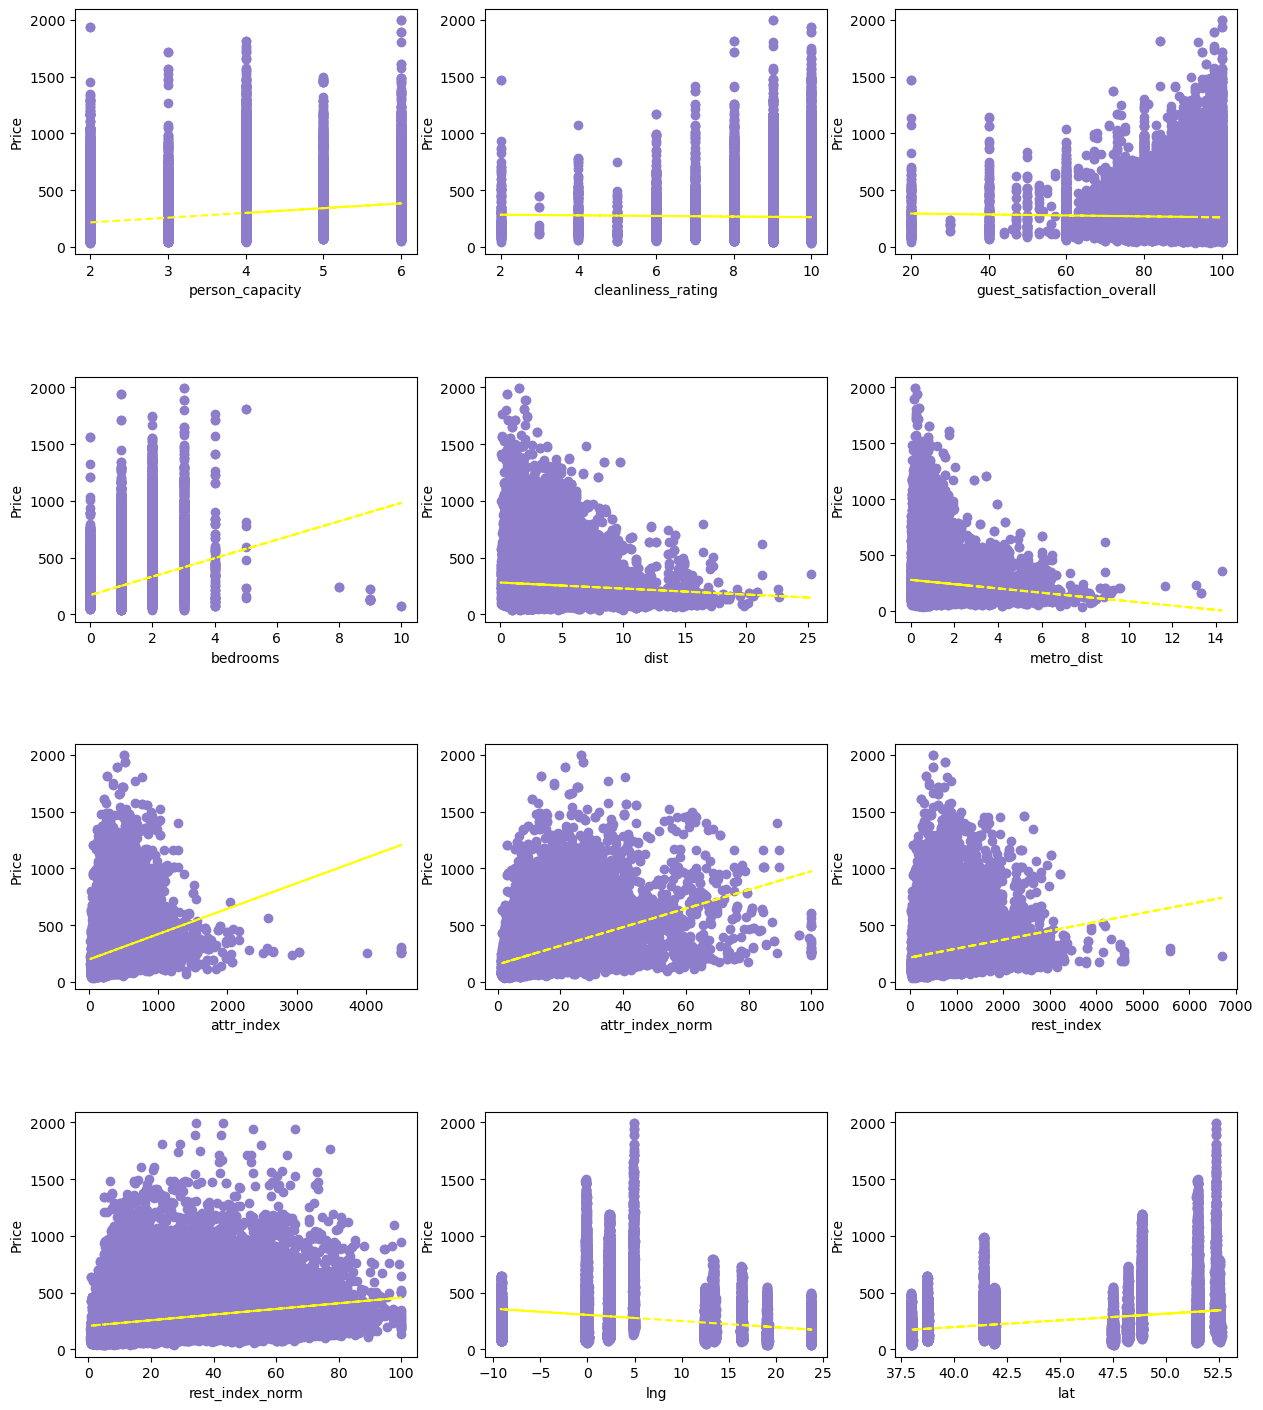

In [27]:
warnings.filterwarnings('ignore')

def plotter_4(feature,color,x,y):
        
    axes[x,y].scatter(y=europe_data_2["realSum"], x=europe_data_2[feature],c=color)
    trend_line = np.poly1d(np.polyfit(europe_data_2[feature], europe_data_2["realSum"], 1))
    axes[x,y].plot(europe_data_2[feature], trend_line(europe_data_2[feature]), "r--",c='yellow')
    axes[x,y].set_ylabel("Price")
    axes[x,y].set_xlabel(feature)

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 17.5))
x = 0
y = 0
for i in range(12):
    plotter_4(europe_data_2_numerical_features[i] , '#8d7dca',x,y)
    y  = y + 1
    if y == 3:
        x = x + 1
        y = 0

plt.subplots_adjust(hspace=0.5)

<ul>
<li style="color:#52796f; font-size:0.85em;">
    <h3>No of bedrooms, person capacity,attraction index & restaurant index are the features that show good positive trend as their values increase</h3></li>
<li style="color:#52796f; font-size:0.85em;">
    <h3>other features such as cleanliness rating and guest satisfaction have near to neutral trend lines throughout their value range.</h3></li>
<li style="color:#52796f; font-size:0.85em;">
    <h3>Distance from city centre and nearest metro station have slighly negative trend lines as their values increase</h3></li>  
<li style="color:#52796f; font-size:0.85em;">
    <h3>We will be checking these trends and corelations with the realSum later when we calculation the corelation between features</h3></li>  
</ul>

# <span style="color:#01686f; font-size:0.75em;">CATEGORICAL & BINARY FEATURES, THEIR COUNTS AND RELATION WITH OUTPUT THROUGH BOXPLOT</span>

In [28]:
europe_data_2_categorical_features = ['room_type','room_shared','room_private','host_is_superhost','multi','biz','week time']

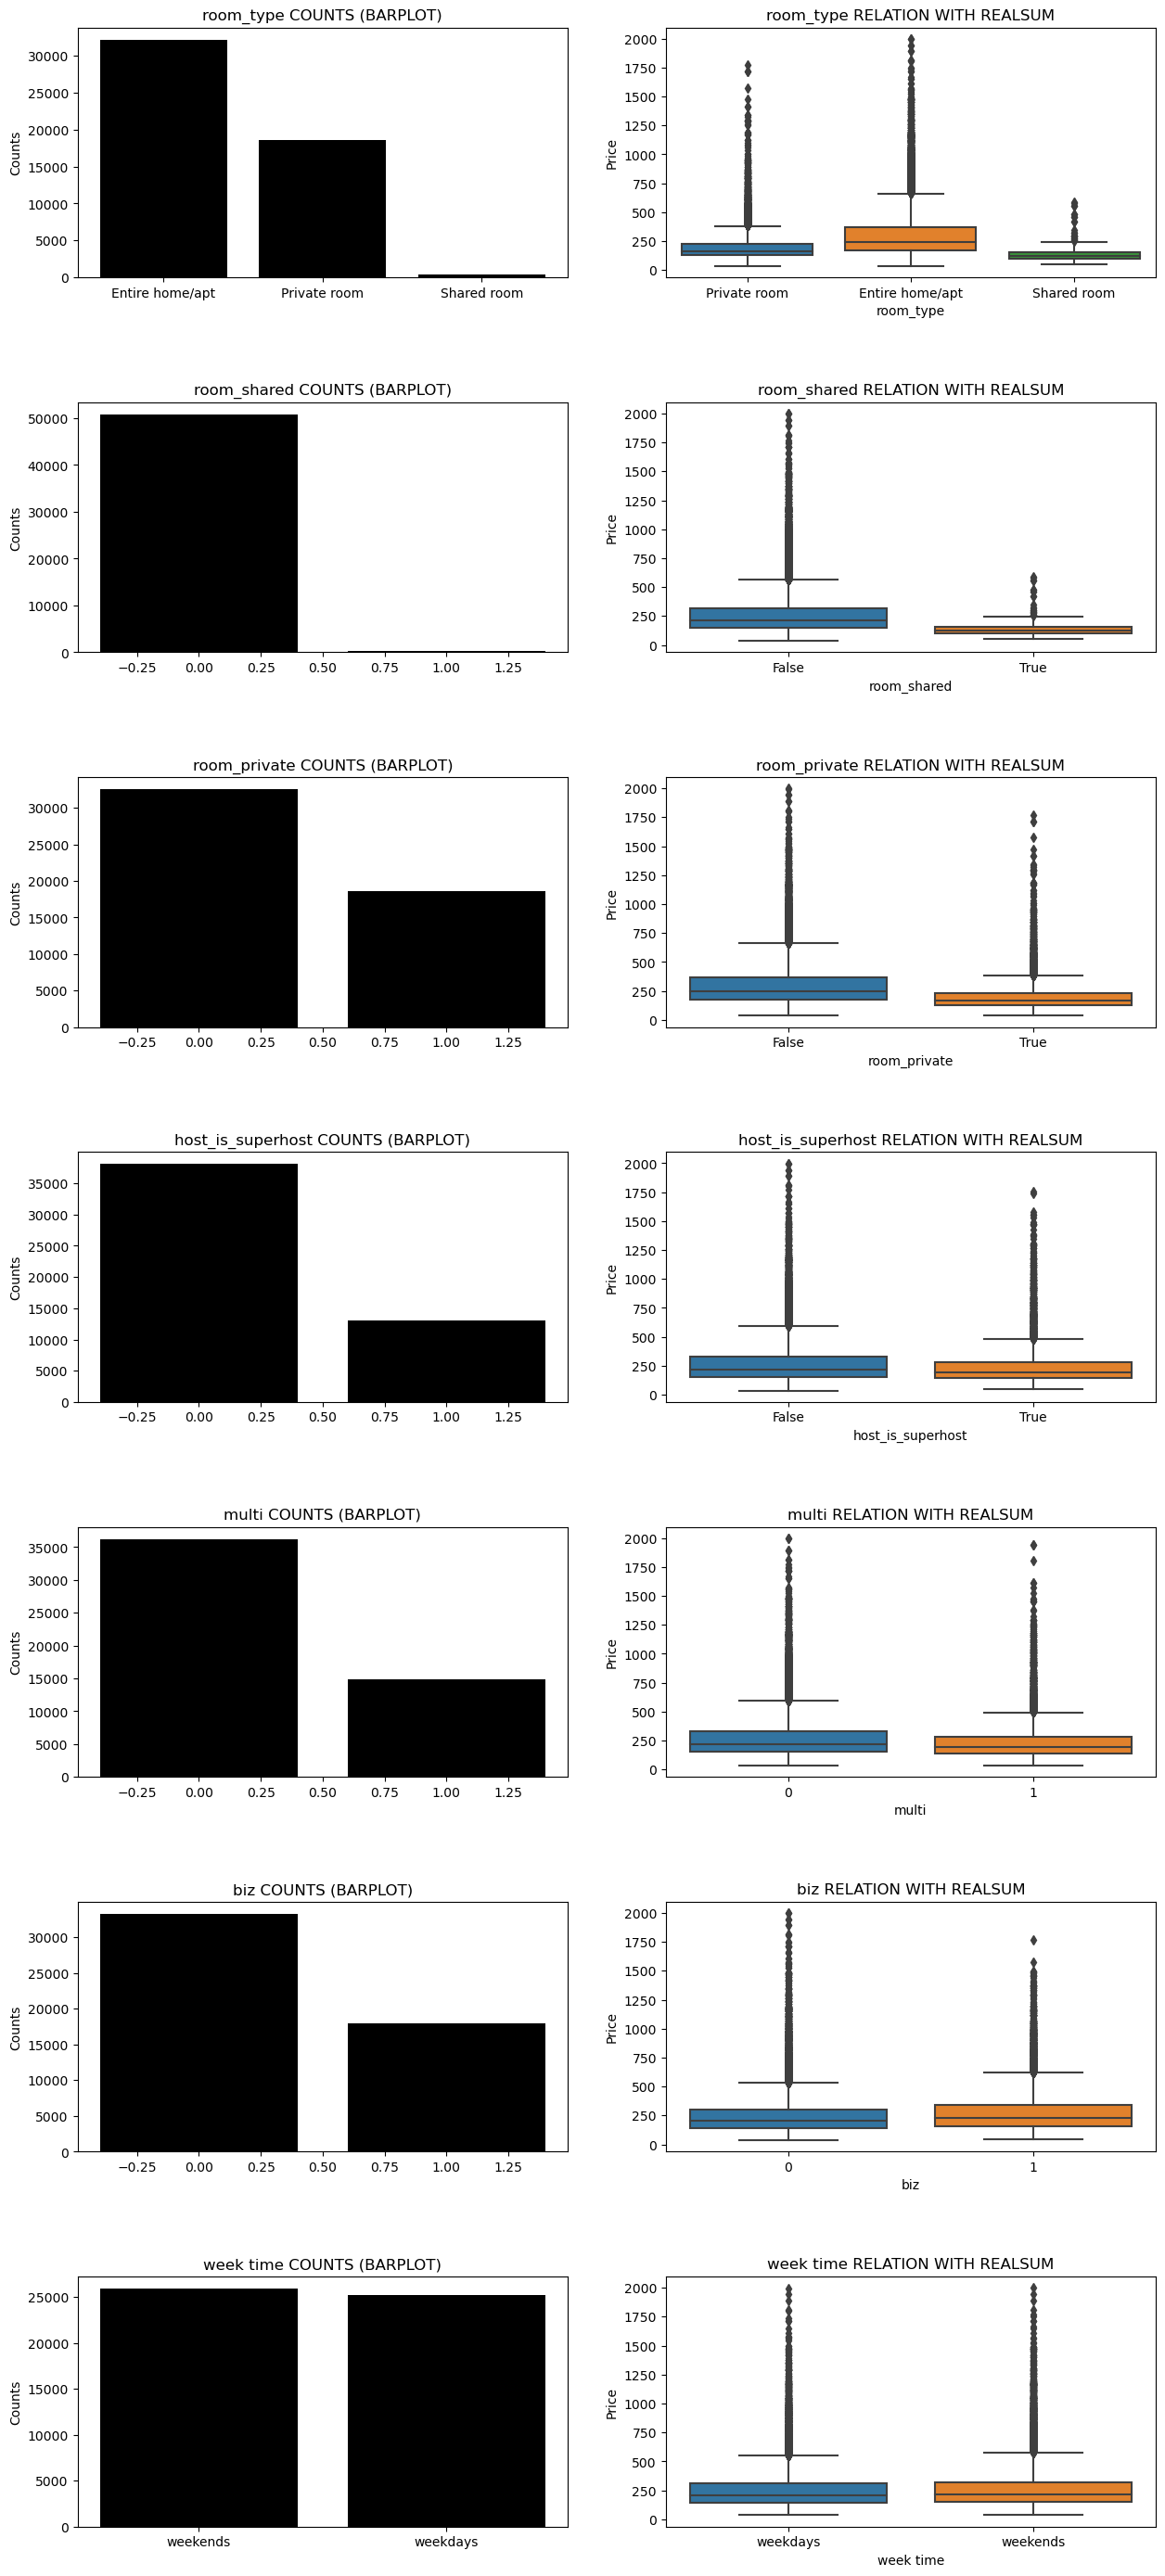

In [29]:
def plotter_5(feature,color,row):
    axes[row,0].bar(x = list(europe_data_2[feature].value_counts().index), height=list(europe_data_2[feature].value_counts().values),color=color)
    axes[row,0].set_ylabel("Counts")
    axes[row,0].set_title(str(feature)+" COUNTS (BARPLOT)")
    
    sns.boxplot(data=europe_data_2,x = feature,y = 'realSum',ax=axes[row,1])
    axes[row,1].set_ylabel("Price")
    axes[row,1].set_title(str(feature)+" RELATION WITH REALSUM")

    
plt.figure
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(15, 35))

for i in range(7):
    plotter_5(europe_data_2_categorical_features[i] , '000000' , i)

plt.subplots_adjust(hspace=0.50)
plt.show()

# <span style="color:#000000; font-size:1.00em;">DATA PRE-PROCESSING</span>

In [30]:
europe_data_2.columns

Index(['realSum', 'room_type', 'room_shared', 'room_private',
       'person_capacity', 'host_is_superhost', 'multi', 'biz',
       'cleanliness_rating', 'guest_satisfaction_overall', 'bedrooms', 'dist',
       'metro_dist', 'attr_index', 'attr_index_norm', 'rest_index',
       'rest_index_norm', 'lng', 'lat', 'week time', 'city'],
      dtype='object')

In [31]:
europe_data_2.head()

,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,...,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,week time,city
0,194.033698,Private room,False,True,2.0,False,1,0,10.0,93.0,...,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,weekdays,amsterdam
1,344.245776,Private room,False,True,4.0,False,0,0,8.0,85.0,...,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,weekdays,amsterdam
2,264.101422,Private room,False,True,2.0,False,0,1,9.0,87.0,...,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,weekdays,amsterdam
3,433.529398,Private room,False,True,4.0,False,0,1,9.0,90.0,...,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663,weekdays,amsterdam
4,485.552926,Private room,False,True,2.0,True,0,0,10.0,98.0,...,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508,weekdays,amsterdam


# <span style="color:#01686f; font-size:0.75em;">REPLACE TRUE / FALSE BOOLEAN WITH 1 / 0 RESPECTIVELY</span>

In [32]:
europe_data_2.replace({False: 0, True: 1},inplace=True)
europe_data_2.head()

,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,...,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,week time,city
0,194.033698,Private room,0,1,2.0,0,1,0,10.0,93.0,...,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,weekdays,amsterdam
1,344.245776,Private room,0,1,4.0,0,0,0,8.0,85.0,...,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,weekdays,amsterdam
2,264.101422,Private room,0,1,2.0,0,0,1,9.0,87.0,...,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,weekdays,amsterdam
3,433.529398,Private room,0,1,4.0,0,0,1,9.0,90.0,...,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663,weekdays,amsterdam
4,485.552926,Private room,0,1,2.0,1,0,0,10.0,98.0,...,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508,weekdays,amsterdam


<ul>
<li style="color:#52796f; font-size:0.85em;">
    <h3>We can see that the True/ False values in room_shared, room_private and host_is_superhost is converted to 1/0</h3></li>
</ul>

# <span style="color:#01686f; font-size:0.75em;">REPLACE CATEGORICAL VLUES TO DUMMY VARIABLES</span>

In [33]:
print(europe_data_2['room_type'].value_counts())
print(europe_data_2['week time'].value_counts())
print(europe_data_2['city'].value_counts())

Entire home/apt    32182
Private room       18628
Shared room          366
Name: room_type, dtype: int64
weekends    25926
weekdays    25250
Name: week time, dtype: int64
london       9881
rome         8929
paris        6590
lisbon       5727
athens       5231
budapest     3979
vienna       3524
barcelona    2802
berlin       2455
amsterdam    2058
Name: city, dtype: int64


In [34]:
europe_data_2_categorical_dummies = pd.get_dummies(europe_data_2[['room_type','week time','city']],drop_first=True)
europe_data_3 = pd.concat([europe_data_2_categorical_dummies, europe_data_2.drop(columns=['room_type','week time', 'city'])], axis=1)

In [35]:
europe_data_3

,room_type_Private room,room_type_Shared room,week time_weekends,city_athens,city_barcelona,city_berlin,city_budapest,city_lisbon,city_london,city_paris,...,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
0,1,0,0,0,0,0,0,0,0,0,...,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772
1,1,0,0,0,0,0,0,0,0,0,...,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432
2,1,0,0,0,0,0,0,0,0,0,...,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103
3,1,0,0,0,0,0,0,0,0,0,...,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663
4,1,0,0,0,0,0,0,0,0,0,...,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51171,0,0,1,0,0,0,0,0,0,0,...,100.0,3,0.530181,0.135447,219.402478,15.712158,438.756874,10.604584,16.37940,48.21136
51172,0,0,1,0,0,0,0,0,0,0,...,86.0,1,0.810205,0.100839,204.970121,14.678608,342.182813,8.270427,16.38070,48.20296
51173,0,0,1,0,0,0,0,0,0,0,...,93.0,1,0.994051,0.202539,169.073402,12.107921,282.296424,6.822996,16.38568,48.20460
51174,1,0,1,0,0,0,0,0,0,0,...,87.0,1,3.044100,0.287435,109.236574,7.822803,158.563398,3.832416,16.34100,48.19200


<ul>
<li style="color:#52796f; font-size:0.85em;">
    <h3>Using pandas'get dummies function, we will find dummy values / columns of categorical features room type, week time and city.</h3></li>
<li style="color:#52796f; font-size:0.85em;">
    <h3>There are slight variances and difference in median realSum of different cities, thus we have also converted the cities feature to dummies variable, thus these can be a useful feature in creating the model later.</h3></li> 
<li style="color:#52796f; font-size:0.85em;">
    <h3>We have saved this dataframe containing the dummy variables in a variable called europe_data_3</h3></li>   
</ul>

# <span style="color:#01686f; font-size:0.75em;">CHECKING FOR AND REMOVING REDUNDANT VARIABLES</span>

<AxesSubplot:>

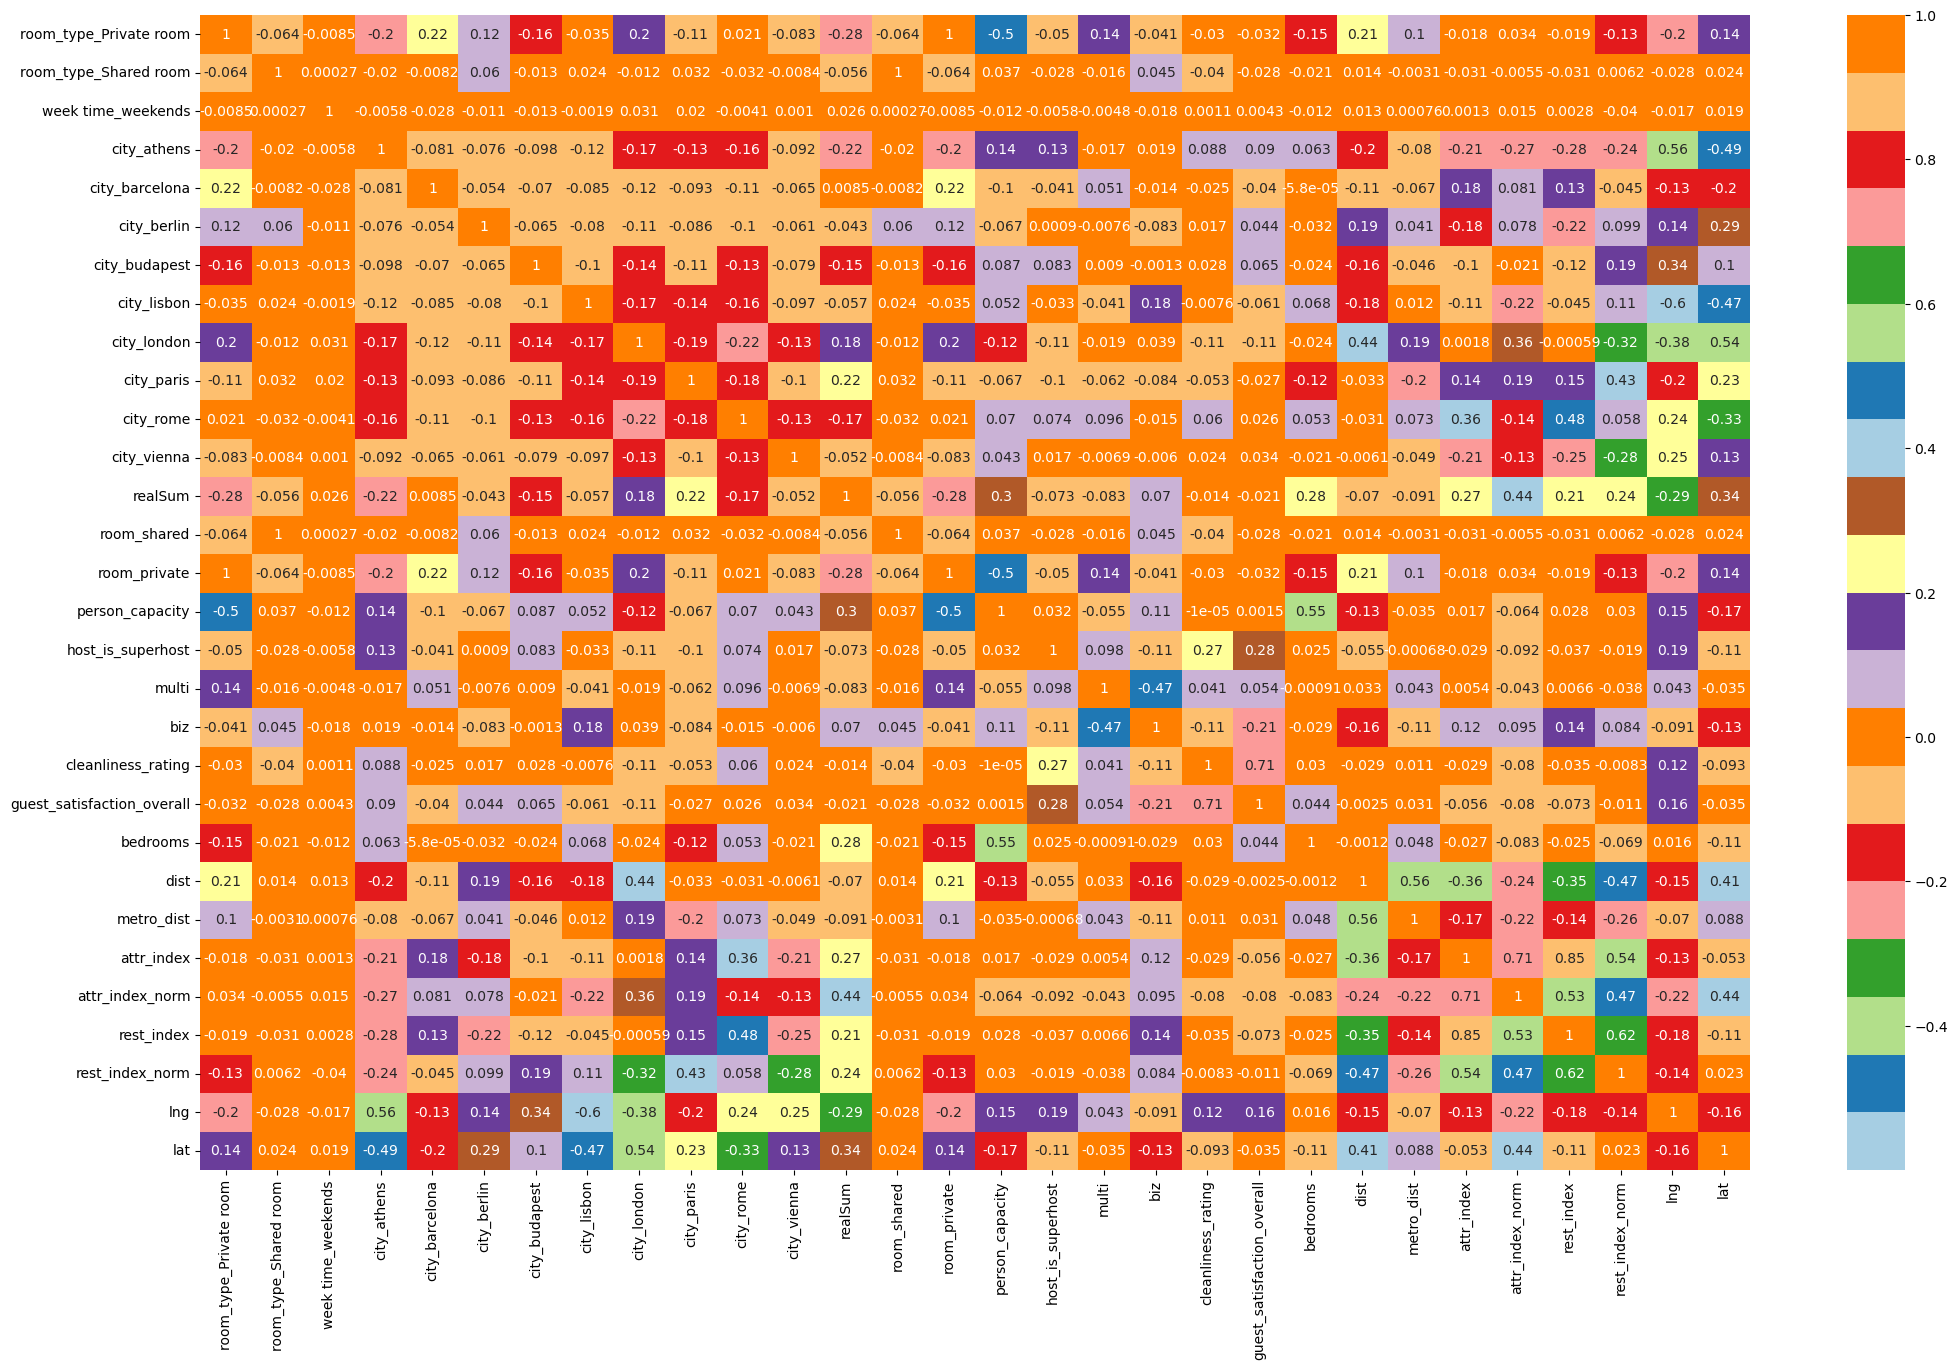

In [36]:
plt.figure
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(25, 15))
sns.heatmap(europe_data_3.corr(),cmap=sns.color_palette("Paired",20),annot=True,ax=axes)

<ul>
<li style="color:#52796f; font-size:0.85em;">
<h3>There are features tha have perfect corelation, thus these are the redundant features and it is safe to remove one of them. THus we will remove room_shared and room_private.</h3></li>   
<li style="color:#52796f; font-size:0.85em;">
<h3>We will also remove rest_index_norm and attr_index_norm , since for the moment we have non_normalized forms of these features anf we will be scaling them in the later part of the project where we will be creating the model, thus for the time being it is safe to remove these for analyzing and study purpose</h3></li>   
</ul>

In [37]:
europe_data_3.drop(columns = ['rest_index_norm','attr_index_norm','room_shared','room_private'],inplace=True)

<AxesSubplot:>

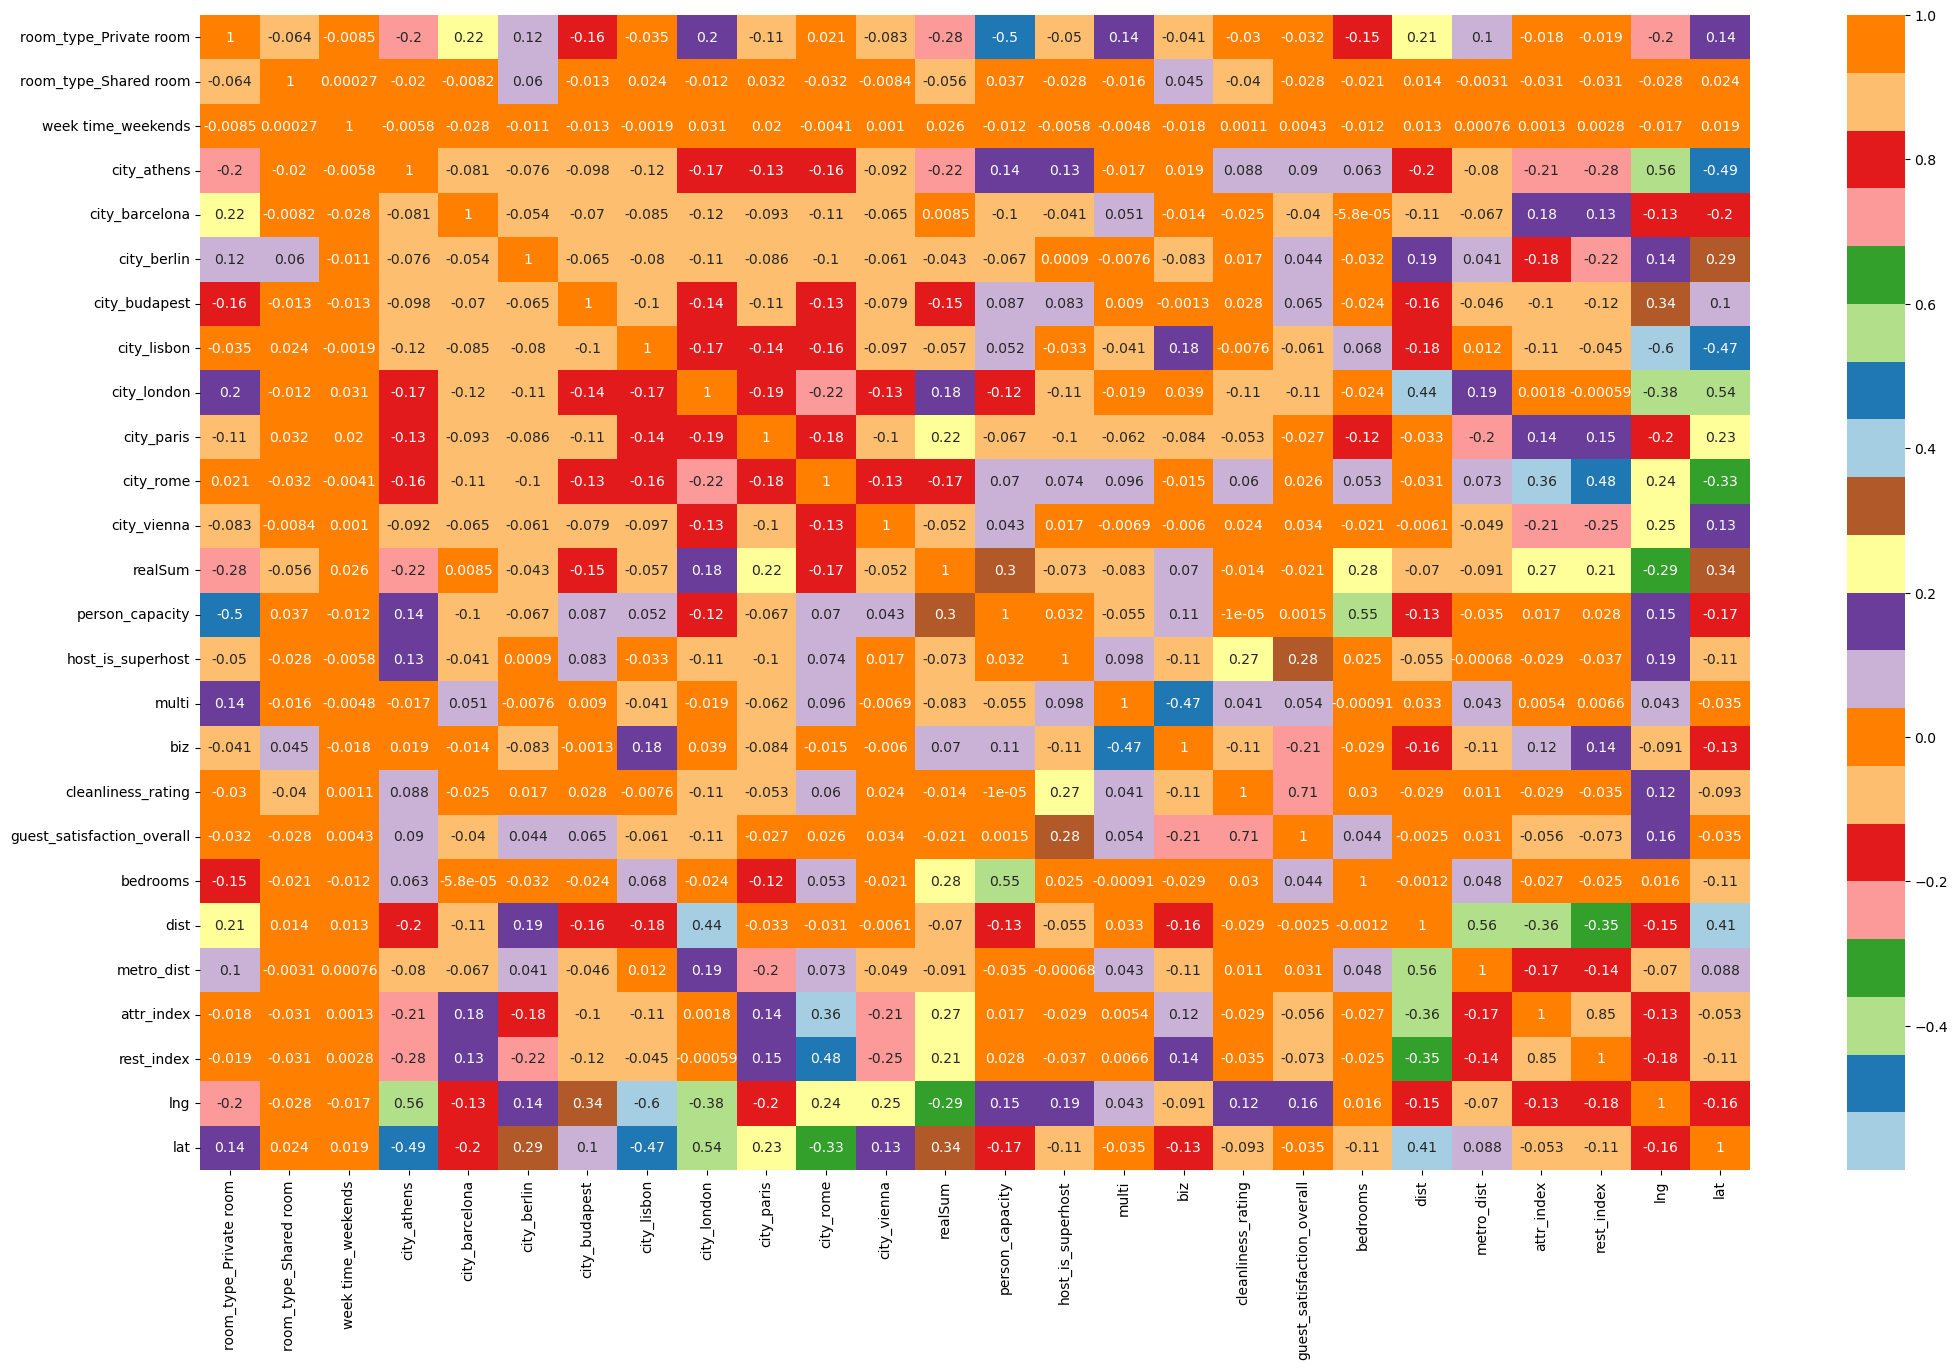

In [38]:
plt.figure
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(25, 15))
sns.heatmap(europe_data_3.corr(),cmap=sns.color_palette("Paired",20),annot=True,ax=axes)

# <span style="color:#01686f; font-size:0.75em;">COMBINING TWO VARIABLES INTO ONE</span>

In [39]:
def combine_lat_long(lng, lat):
    latitude = np.radians(lat)
    longitude = np.radians(lng)

    amsterdam_latitude = np.radians(0)
    amsterdam_longitude = np.radians(0)

    # apply Haversine formula to compute distance
    latitude_distance = amsterdam_latitude - latitude
    longitude_distance = amsterdam_longitude - longitude
    a = np.sin(latitude_distance/2)**2 + np.cos(latitude) * np.cos(amsterdam_latitude) * np.sin(longitude_distance/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    distance = 6371 * c

    return distance

<ul>
<li style="color:#52796f; font-size:0.85em;">
<h3>The function above combines the features latitude and longitude into a single feature, which is calculated using the haversine distance formula between the latitude and longitude of the listing and co-ordinates of null island (The point on earth where the latitude and longitude is 0)</h3></li>
<li style="color:#52796f; font-size:0.85em;">
<h3>The next thing to do would be to remove the features latitude and longitude (lat and lng), which would have already been converted to a single metric, haversine distance</h3></li>
</ul>

In [40]:
europe_data_3['Haversine Distance'] = combine_lat_long(europe_data_3['lng'],europe_data_3['lat'])

In [41]:
europe_data_3.head()

,room_type_Private room,room_type_Shared room,week time_weekends,city_athens,city_barcelona,city_berlin,city_budapest,city_lisbon,city_london,city_paris,...,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,rest_index,lng,lat,Haversine Distance
0,1,0,0,0,0,0,0,0,0,0,...,10.0,93.0,1,5.022964,2.539380,78.690379,98.253896,4.90569,52.41772,5846.526443
1,1,0,0,0,0,0,0,0,0,0,...,8.0,85.0,1,0.488389,0.239404,631.176378,837.280757,4.90005,52.37432,5841.687430
2,1,0,0,0,0,0,0,0,0,0,...,9.0,87.0,1,5.748312,3.651621,75.275877,95.386955,4.97512,52.36103,5840.771088
3,1,0,0,0,0,0,0,0,0,0,...,9.0,90.0,2,0.384862,0.439876,493.272534,875.033098,4.89417,52.37663,5841.899872
4,1,0,0,0,0,0,0,0,0,0,...,10.0,98.0,1,0.544738,0.318693,552.830324,815.305740,4.90051,52.37508,5841.774808


In [42]:
europe_data_3.drop(columns=['lng','lat'],inplace=True)

In [43]:
europe_data_3.head()

,room_type_Private room,room_type_Shared room,week time_weekends,city_athens,city_barcelona,city_berlin,city_budapest,city_lisbon,city_london,city_paris,...,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,rest_index,Haversine Distance
0,1,0,0,0,0,0,0,0,0,0,...,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,98.253896,5846.526443
1,1,0,0,0,0,0,0,0,0,0,...,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,837.280757,5841.687430
2,1,0,0,0,0,0,0,0,0,0,...,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,95.386955,5840.771088
3,1,0,0,0,0,0,0,0,0,0,...,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,875.033098,5841.899872
4,1,0,0,0,0,0,0,0,0,0,...,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,815.305740,5841.774808


# <span style="color:#01686f; font-size:0.75em;">SCALING THE FEATURES</span>

In [44]:
Standard_Scaler = StandardScaler()

In [45]:
europe_data_3.shape

(51176, 25)

In [46]:
europe_data_3.columns

Index(['room_type_Private room', 'room_type_Shared room', 'week time_weekends',
       'city_athens', 'city_barcelona', 'city_berlin', 'city_budapest',
       'city_lisbon', 'city_london', 'city_paris', 'city_rome', 'city_vienna',
       'realSum', 'person_capacity', 'host_is_superhost', 'multi', 'biz',
       'cleanliness_rating', 'guest_satisfaction_overall', 'bedrooms', 'dist',
       'metro_dist', 'attr_index', 'rest_index', 'Haversine Distance'],
      dtype='object')

In [47]:
features_to_scale = ['person_capacity','cleanliness_rating','guest_satisfaction_overall','bedrooms','dist','metro_dist','attr_index','rest_index','Haversine Distance']
features_not_to_scale = ['room_type_Private room', 'room_type_Shared room', 'week time_weekends','city_athens', 
                         'city_barcelona', 'city_berlin', 'city_budapest','city_lisbon', 'city_london', 'city_paris', 
                         'city_rome', 'city_vienna','realSum','host_is_superhost', 'multi', 'biz',]

In [48]:
scaled_features = pd.DataFrame(Standard_Scaler.fit_transform(europe_data_3[features_to_scale]), columns=features_to_scale)
scaled_features.head()

,person_capacity,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,rest_index,Haversine Distance
0,-0.889640,0.639872,0.044035,-0.241981,0.761073,2.155114,-0.959748,-1.060877,1.222122
1,0.663137,-1.453601,-0.850222,-0.241981,-1.130383,-0.515641,1.521451,0.430720,1.212497
2,-0.889640,-0.406864,-0.626657,-0.241981,1.063629,3.446659,-0.975082,-1.066664,1.210675
3,0.663137,-0.406864,-0.291311,1.378486,-1.173566,-0.282851,0.902129,0.506916,1.212920
4,-0.889640,0.639872,0.602945,-0.241981,-1.106878,-0.423570,1.169601,0.386367,1.212671


In [49]:
europe_data_final = pd.concat([scaled_features.reset_index(drop=True),  europe_data_3[features_not_to_scale].reset_index(drop=True)], axis=1)
europe_data_final.head()

,person_capacity,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,rest_index,Haversine Distance,room_type_Private room,...,city_budapest,city_lisbon,city_london,city_paris,city_rome,city_vienna,realSum,host_is_superhost,multi,biz
0,-0.889640,0.639872,0.044035,-0.241981,0.761073,2.155114,-0.959748,-1.060877,1.222122,1,...,0,0,0,0,0,0,194.033698,0,1,0
1,0.663137,-1.453601,-0.850222,-0.241981,-1.130383,-0.515641,1.521451,0.430720,1.212497,1,...,0,0,0,0,0,0,344.245776,0,0,0
2,-0.889640,-0.406864,-0.626657,-0.241981,1.063629,3.446659,-0.975082,-1.066664,1.210675,1,...,0,0,0,0,0,0,264.101422,0,0,1
3,0.663137,-0.406864,-0.291311,1.378486,-1.173566,-0.282851,0.902129,0.506916,1.212920,1,...,0,0,0,0,0,0,433.529398,0,0,1
4,-0.889640,0.639872,0.602945,-0.241981,-1.106878,-0.423570,1.169601,0.386367,1.212671,1,...,0,0,0,0,0,0,485.552926,1,0,0


In [50]:
print('SHape of europe_data_3 : ' + str(europe_data_3.shape))
print('SHape of europe_data_final : ' + str(europe_data_final.shape))

SHape of europe_data_3 : (51176, 25)
SHape of europe_data_final : (51176, 25)


<ul>
<li style="color:#52796f; font-size:0.85em;">
<h3>There is a blueprint of creating models that we will follow</h3></li>
<ul>
<li style="color:#52796f; font-size:0.85em;">
<h3>Scale features (Already done)</h3></li>
<li style="color:#52796f; font-size:0.85em;">
<h3>Select Regression model</h3></li>
<li style="color:#52796f; font-size:0.85em;">
<h3>Select best features using backward sequential feature selection (If less time is required to perform)</h3></li>
<li style="color:#52796f; font-size:0.85em;">
<h3>Fit the model and print training evaluation metrics</h3></li>
<li style="color:#52796f; font-size:0.85em;">
<h3>Predict using the model and print prediction evaluation metrics</h3></li>
</ul>
<li style="color:#52796f; font-size:0.85em;">
<h3>Print training and prediction evaluation metrics of both best features and all features</h3></li>
</ul>

# <span style="color:#000000; font-size:1.00em;">REGRESSION MODELS</span>

# <span style="color:#01686f; font-size:0.75em;">CREATING INPUTS AND OUTPUTS</span>

In [51]:
X_train , X_test , Y_train , Y_test = train_test_split(europe_data_final.drop(columns=['realSum']) , 
                                                       europe_data_final['realSum'],
                                                       random_state=4,
                                                       test_size=0.15,
                                                       stratify=europe_data_final[['week time_weekends','city_athens', 
'city_barcelona', 'city_berlin', 'city_budapest','city_lisbon', 'city_london', 'city_paris', 'city_rome', 'city_vienna']])
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(43499, 24)
(43499,)
(7677, 24)
(7677,)


# <span style="color:#01686f; font-size:0.75em;">SEQUENTIAL FEATURE SELECTION FUNCTION</span>

In [52]:
def sequential_feature_selection(model,X_train,Y_train,X_test):
    sfs = SequentialFeatureSelector(model,  direction='backward', scoring='r2', cv=5)
    sfs.fit(X_train, Y_train)
    X_train_selected = sfs.transform(X_train)
    X_test_selected = sfs.transform(X_test)
    return X_train_selected, X_test_selected

# <span style="color:#01686f; font-size:0.75em;">LINEAR REGRESSION</span>


In [53]:
LR = LinearRegression()
LR_2 = LinearRegression()

In [54]:
X_train_selected, X_test_selected = sequential_feature_selection(LinearRegression(),X_train,Y_train,X_test)

In [55]:
LR.fit(X_train,Y_train)
LR_2.fit(X_train_selected, Y_train)

LinearRegression()

In [56]:
LR_fit_evaulation = {'Linear Regression Fitting Evaluation (All Features)':
    {'No. of Features':LR.n_features_in_,
     'R_squared score (Train)':LR.score(X_train,Y_train),
     'R_squared score (Test)':LR.score(X_test,Y_test)},
                     'Linear Regression Fitting Evaluation (Best Features)':
    {'No. of Features':LR.n_features_in_,
     'R_squared score (Train)':LR_2.score(X_train_selected,Y_train),
     'R_squared score (Test)':LR_2.score(X_test_selected,Y_test)},
                                                 }
LR_fit_evaulation = pd.DataFrame(LR_fit_evaulation)
LR_fit_evaulation

,Linear Regression Fitting Evaluation (All Features),Linear Regression Fitting Evaluation (Best Features)
No. of Features,24.000000,24.000000
R_squared score (Train),0.578271,0.552031
R_squared score (Test),0.574260,0.546680


In [57]:
LR_TrainSet_Prediction = LR.predict(X_train)
LR_TestSet_Prediction = LR.predict(X_test)
LR_TrainSet_Prediction_2 = LR_2.predict(X_train_selected)
LR_TestSet_Prediction_2 = LR_2.predict(X_test_selected)

In [58]:
LR_predict_evaulation = {'Linear Regression Predictions Evaluation (All Features)':
    {'Train MSE': mean_squared_error(Y_train,LR_TrainSet_Prediction),
     'Test MSE' : mean_squared_error(Y_test,LR_TestSet_Prediction),
     'Train RMSE': mean_squared_error(Y_train,LR_TrainSet_Prediction,squared=False),
     'Test RMSE' : mean_squared_error(Y_test,LR_TestSet_Prediction,squared=False)},
                         'Linear Regression Predictions Evaluation (Best Features)':
    {'Train MSE': mean_squared_error(Y_train,LR_TrainSet_Prediction_2),
     'Test MSE' : mean_squared_error(Y_test,LR_TestSet_Prediction_2),
     'Train RMSE': mean_squared_error(Y_train,LR_TrainSet_Prediction_2,squared=False),
     'Test RMSE' : mean_squared_error(Y_test,LR_TestSet_Prediction_2,squared=False)},
    }
LR_predict_evaulation = pd.DataFrame(LR_predict_evaulation)
LR_predict_evaulation

,Linear Regression Predictions Evaluation (All Features),Linear Regression Predictions Evaluation (Best Features)
Train MSE,14042.389487,14916.126366
Test MSE,13601.088712,14482.212767
Train RMSE,118.500589,122.131594
Test RMSE,116.623706,120.342066


# <span style="color:#01686f; font-size:0.75em;">RIDGE REGRESSION</span>

In [59]:
R = Ridge()
R_2 = Ridge()

In [60]:
X_train_selected, X_test_selected = sequential_feature_selection(Ridge(),X_train,Y_train,X_test)

In [61]:
R.fit(X_train,Y_train)
R_2.fit(X_train_selected, Y_train)

Ridge()

In [62]:
R_fit_evaulation = {'Ridge Regression Fitting Evaluation (All Features)':
    {'No. of Features':R.n_features_in_,
     'R_squared score (Train)':R.score(X_train,Y_train),
     'R_squared score (Test)':R.score(X_test,Y_test)},
                     'Ridge Regression Fitting Evaluation (Best Features)':
    {'No. of Features':R_2.n_features_in_,
     'R_squared score (Train)':R_2.score(X_train_selected,Y_train),
     'R_squared score (Test)':R_2.score(X_test_selected,Y_test)},
                                                 }
R_fit_evaulation = pd.DataFrame(R_fit_evaulation)
R_fit_evaulation

,Ridge Regression Fitting Evaluation (All Features),Ridge Regression Fitting Evaluation (Best Features)
No. of Features,24.000000,12.000000
R_squared score (Train),0.578270,0.552030
R_squared score (Test),0.574318,0.546739


In [63]:
R_TrainSet_Prediction = R.predict(X_train)
R_TestSet_Prediction = R.predict(X_test)
R_TrainSet_Prediction_2 = R_2.predict(X_train_selected)
R_TestSet_Prediction_2 = R_2.predict(X_test_selected)

In [64]:
R_predict_evaulation = {'Ridge Regression Predictions Evaluation (All Features)':
    {'Train MSE': mean_squared_error(Y_train,R_TrainSet_Prediction),
     'Test MSE' : mean_squared_error(Y_test,R_TestSet_Prediction),
     'Train RMSE': mean_squared_error(Y_train,R_TrainSet_Prediction,squared=False),
     'Test RMSE' : mean_squared_error(Y_test,R_TestSet_Prediction,squared=False)},
                         'Ridge Regression Predictions Evaluation (Best Features)':
    {'Train MSE': mean_squared_error(Y_train,R_TrainSet_Prediction_2),
     'Test MSE' : mean_squared_error(Y_test,R_TestSet_Prediction_2),
     'Train RMSE': mean_squared_error(Y_train,R_TrainSet_Prediction_2,squared=False),
     'Test RMSE' : mean_squared_error(Y_test,R_TestSet_Prediction_2,squared=False)},
    }
R_predict_evaulation = pd.DataFrame(R_predict_evaulation)
R_predict_evaulation

,Ridge Regression Predictions Evaluation (All Features),Ridge Regression Predictions Evaluation (Best Features)
Train MSE,14042.424456,14916.150775
Test MSE,13599.242913,14480.328158
Train RMSE,118.500736,122.131694
Test RMSE,116.615792,120.334235


# <span style="color:#01686f; font-size:0.75em;">LASSO REGRESSION</span>

In [65]:
L = Lasso()
L_2 = Lasso()

In [66]:
X_train_selected, X_test_selected = sequential_feature_selection(Lasso(),X_train,Y_train,X_test)

In [67]:
L.fit(X_train,Y_train)
L_2.fit(X_train_selected, Y_train)

Lasso()

In [68]:
L_fit_evaulation = {'Lasso Regression Fitting Evaluation (All Features)':
    {'No. of Features':L.n_features_in_,
     'R_squared score (Train)':L.score(X_train,Y_train),
     'R_squared score (Test)':L.score(X_test,Y_test)},
                     'Lasso Regression Fitting Evaluation (Best Features)':
    {'No. of Features':L_2.n_features_in_,
     'R_squared score (Train)':L_2.score(X_train_selected,Y_train),
     'R_squared score (Test)':L_2.score(X_test_selected,Y_test)},
                                                 }
L_fit_evaulation = pd.DataFrame(L_fit_evaulation)
L_fit_evaulation

,Lasso Regression Fitting Evaluation (All Features),Lasso Regression Fitting Evaluation (Best Features)
No. of Features,24.00000,12.000000
R_squared score (Train),0.54641,0.536776
R_squared score (Test),0.55148,0.539752


In [69]:
L_TrainSet_Prediction = L.predict(X_train)
L_TestSet_Prediction = L.predict(X_test)
L_TrainSet_Prediction_2 = L_2.predict(X_train_selected)
L_TestSet_Prediction_2 = L_2.predict(X_test_selected)

In [70]:
L_predict_evaulation = {'Lasso Regression Predictions Evaluation (All Features)':
    {'Train MSE': mean_squared_error(Y_train,L_TrainSet_Prediction),
     'Test MSE' : mean_squared_error(Y_test,L_TestSet_Prediction),
     'Train RMSE': mean_squared_error(Y_train,L_TrainSet_Prediction,squared=False),
     'Test RMSE' : mean_squared_error(Y_test,L_TestSet_Prediction,squared=False)},
                         'Lasso Regression Predictions Evaluation (Best Features)':
    {'Train MSE': mean_squared_error(Y_train,L_TrainSet_Prediction_2),
     'Test MSE' : mean_squared_error(Y_test,L_TestSet_Prediction_2),
     'Train RMSE': mean_squared_error(Y_train,L_TrainSet_Prediction_2,squared=False),
     'Test RMSE' : mean_squared_error(Y_test,L_TestSet_Prediction_2,squared=False)},
    }
L_predict_evaulation = pd.DataFrame(L_predict_evaulation)
L_predict_evaulation

,Lasso Regression Predictions Evaluation (All Features),Lasso Regression Predictions Evaluation (Best Features)
Train MSE,15103.272609,15424.065072
Test MSE,14328.871467,14703.545037
Train RMSE,122.895373,124.193660
Test RMSE,119.703264,121.258175


# <span style="color:#01686f; font-size:0.75em;">DECISION TREE REGRESSION :
</span>

In [71]:
DTR = DecisionTreeRegressor()

In [72]:
DTR.fit(X_train,Y_train)

DecisionTreeRegressor()

In [73]:
DTR_fit_evaulation = {'Decision Tree Regression Fitting Evaluation (All Features)':
    {'No. of Features':DTR.n_features_in_,
     'R_squared score (Train)':DTR.score(X_train,Y_train),
     'R_squared score (Test)':DTR.score(X_test,Y_test)}}
DTR_fit_evaulation = pd.DataFrame(DTR_fit_evaulation)
DTR_fit_evaulation

,Decision Tree Regression Fitting Evaluation (All Features)
No. of Features,24.000000
R_squared score (Test),0.779395
R_squared score (Train),1.000000


In [74]:
DTR_TrainSet_Prediction = DTR.predict(X_train)
DTR_TestSet_Prediction = DTR.predict(X_test)
# DTR_TrainSet_Prediction_2 = DTR_2.predict(X_train_selected)
# DTR_TestSet_Prediction_2 = DTR_2.predict(X_test_selected)

In [75]:
DTR_predict_evaulation = {'Decision Tree Regression Predictions Evaluation (All Features)':
    {'Train MSE': mean_squared_error(Y_train,DTR_TrainSet_Prediction),
     'Test MSE' : mean_squared_error(Y_test,DTR_TestSet_Prediction),
     'Train RMSE': mean_squared_error(Y_train,DTR_TrainSet_Prediction,squared=False),
     'Test RMSE' : mean_squared_error(Y_test,DTR_TestSet_Prediction,squared=False)},
#                         'Decision Tree Regression Predictions Evaluation (Best Features)':
#    {'Train MSE': mean_squared_error(Y_train,DTR_TrainSet_Prediction_2),
#     'Test MSE' : mean_squared_error(Y_test,DTR_TestSet_Prediction_2),
#     'Train RMSE': mean_squared_error(Y_train,DTR_TrainSet_Prediction_2,squared=False),
#     'Test RMSE' : mean_squared_error(Y_test,DTR_TestSet_Prediction_2,squared=False)},
    }
DTR_predict_evaulation = pd.DataFrame(DTR_predict_evaulation)
DTR_predict_evaulation

,Decision Tree Regression Predictions Evaluation (All Features)
Test MSE,7.047648e+03
Test RMSE,8.395027e+01
Train MSE,7.451371e-30
Train RMSE,2.729720e-15


# <span style="color:#01686f; font-size:0.75em;">RANDOM FOREST REGRESSION :
</span>

In [76]:
RFR = RandomForestRegressor(n_estimators = 50,max_depth=60)
# RFR_2 = RandomForestRegressor(n_estimators = 50)

In [77]:
# X_train_selected, X_test_selected = sequential_feature_selection(RandomForestRegressor(),X_train,Y_train,X_test)

In [78]:
RFR.fit(X_train,Y_train)
# RFR_2.fit(X_train_selected, Y_train)

RandomForestRegressor(max_depth=60, n_estimators=50)

In [79]:
RFR_fit_evaulation = {'Random Forest Regression Fitting Evaluation (All Features)':
    {'No. of Features':RFR.n_features_in_,
     'R_squared score (Train)':RFR.score(X_train,Y_train),
     'R_squared score (Test)':RFR.score(X_test,Y_test)},
#                     'Random Forest Regression Fitting Evaluation (Best Features)':
#    {'No. of Features':RFR_2.n_features_in_,
#     'R_squared score (Train)':RFR_2.score(X_train_selected,Y_train),
#     'R_squared score (Test)':RFR_2.score(X_test_selected,Y_test)},
                                                 }
RFR_fit_evaulation = pd.DataFrame(RFR_fit_evaulation)
RFR_fit_evaulation

,Random Forest Regression Fitting Evaluation (All Features)
No. of Features,24.000000
R_squared score (Test),0.857424
R_squared score (Train),0.978897


In [80]:
RFR_TrainSet_Prediction = RFR.predict(X_train)
RFR_TestSet_Prediction = RFR.predict(X_test)
# RFR_TrainSet_Prediction_2 = RFR_2.predict(X_train_selected)
# RFR_TestSet_Prediction_2 = RFR_2.predict(X_test_selected)

In [81]:
RFR_predict_evaulation = {'Ranndom Forest Regression Predictions Evaluation (All Features)':
    {'Train MSE': mean_squared_error(Y_train,RFR_TrainSet_Prediction),
     'Test MSE' : mean_squared_error(Y_test,RFR_TestSet_Prediction),
     'Train RMSE': mean_squared_error(Y_train,RFR_TrainSet_Prediction,squared=False),
     'Test RMSE' : mean_squared_error(Y_test,RFR_TestSet_Prediction,squared=False)},
 #                        'Ranndom Forest Regression Predictions Evaluation (Best Features)':
 #   {'Train MSE': mean_squared_error(Y_train,DRFRTrainSet_Prediction_2),
 #    'Test MSE' : mean_squared_error(Y_test,RFR_TestSet_Prediction_2),
 #    'Train RMSE': mean_squared_error(Y_train,RFR_TrainSet_Prediction_2,squared=False),
 #    'Test RMSE' : mean_squared_error(Y_test,RFR_TestSet_Prediction_2,squared=False)},
    }
RFR_predict_evaulation = pd.DataFrame(RFR_predict_evaulation)
RFR_predict_evaulation

,Ranndom Forest Regression Predictions Evaluation (All Features)
Test MSE,4554.886312
Test RMSE,67.489898
Train MSE,702.687026
Train RMSE,26.508244
